# Quantify wall interaction effects in trajectories

In [319]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 23 17:56:27 2020

@author: Deepak
"""

import GravityMachineTrack
import imp
import pandas as pd
import numpy as np
import os
imp.reload(GravityMachineTrack)
import matplotlib.pyplot as plt


%matplotlib notebook

# Track file
trackFile = 'G:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Polychaete_4D/Polychaete6/track_mod.csv'
# trackFile = 'G:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Starfish/StarFish6/track_mod_1.csv'
# trackFile = 'G:/Hopkins_2018_08_31_MarineSnow/MarSno2/track_cropped.csv'
# trackFile = 'G:/HopkinsEmbroyologyCourse_GoodData/BrittleStar/BrittleStar9_Long_Good_Ytracking/track_mod.csv'
# trackFile = 'G:/HopkinsEmbroyologyCourse_GoodData/2018_06_13/Snail/Snail1/track_mod.csv'
# trackFile = 'H:/GravityMachine_Nov2019_Stentor_Euglena_etc/Stentor_18_10_2019/track4/track000.csv'
# trackFile = 'H:/2019 Monterey Trip/GM_v2_Berg_DataBackup/2019_08_15/dino1/track000.csv'
# trackFile = 'H:/2019 Monterey Trip/GM_v2_Berg_DataBackup/2019_08_15/dino10/track000.csv'

# trackFile = 'G:/GravityMachine_Controls_AbioticData/Biotic_ControlExperiments/VolvoxControls_GravityMachine_2018_10_28/Volvox20_phototaxis/track.csv'

Organism, *rest = os.path.split(trackFile)

*rest, Organism = os.path.split(Organism)


track = GravityMachineTrack.gravMachineTrack(trackFile = trackFile, organism = Organism, Tmin = 170, Tmax = 300, 
                                             findDims = True, smoothing_factor =10)
print(Organism)

Path : G:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Polychaete_4D/Polychaete6
['Time', 'Xobjet', 'Yobjet', 'Zobjet', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
10019
17561
Track duration : 129.98709154129025
Sampling frequency: 58.013452801969535
Smoothing window: 0.1723738118835172
Computed Image height, Image width: 540, 720
0.0031847133757961785
Pixel per mm : 314.0
Color thresholds available! 
 Loading file G:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Polychaete_4D\colorThresholds.pkl ...
Color thresholds for segmentation: 
 LOW: (0, 0, 83), HIGH : (255, 255, 255)
G:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Polychaete_4D/Polychaete6
Loading organism size from memory ...
**************************************************
Organism dimension 0.22170685810647955 mm
Organism Major dimension 0.12739816896475045 mm
Organism Minor dimension 0.31601554

<IPython.core.display.Javascript object>


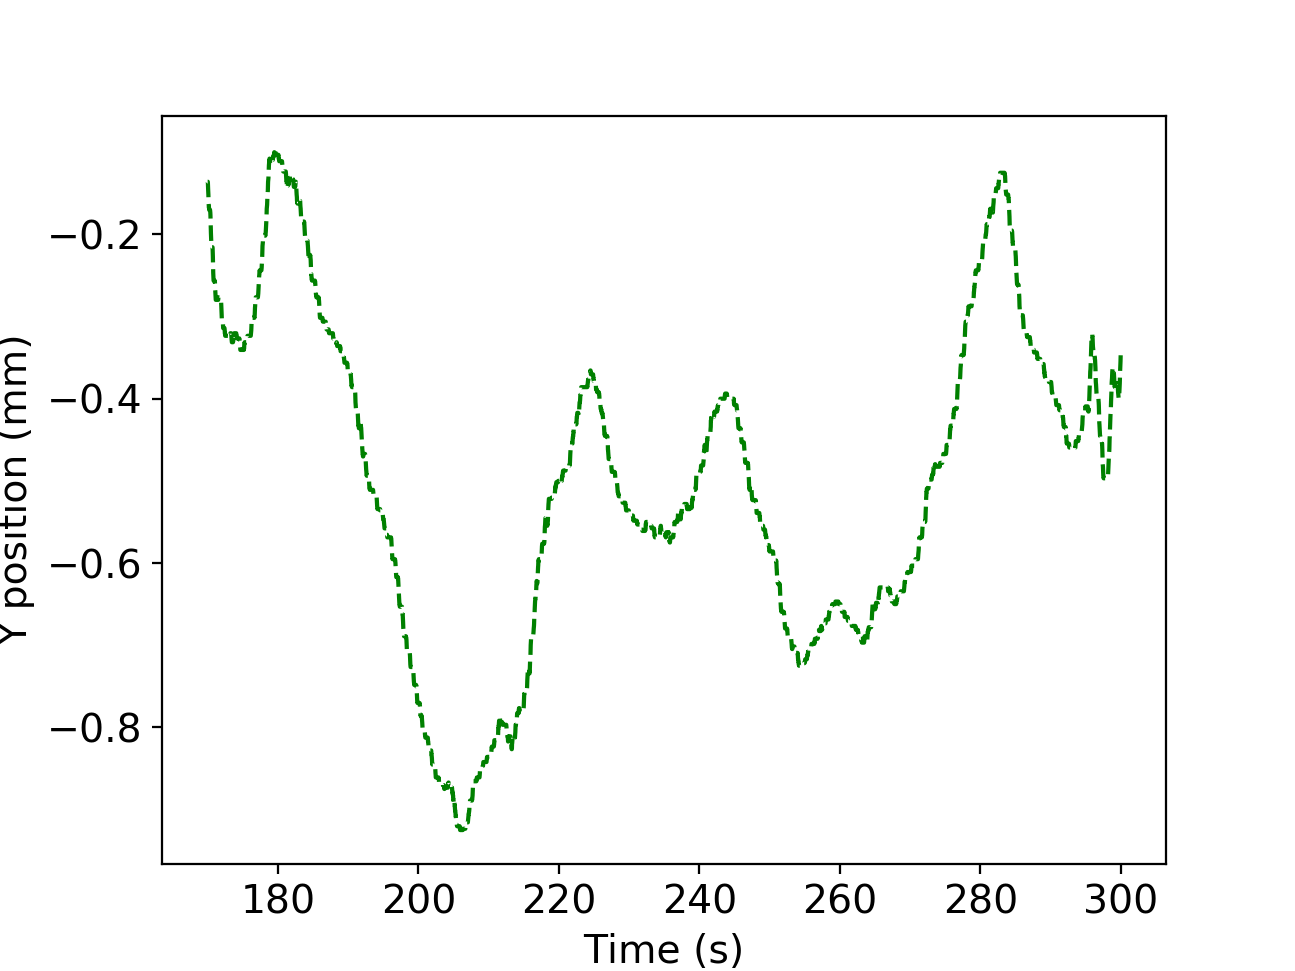

<IPython.core.display.Javascript object>


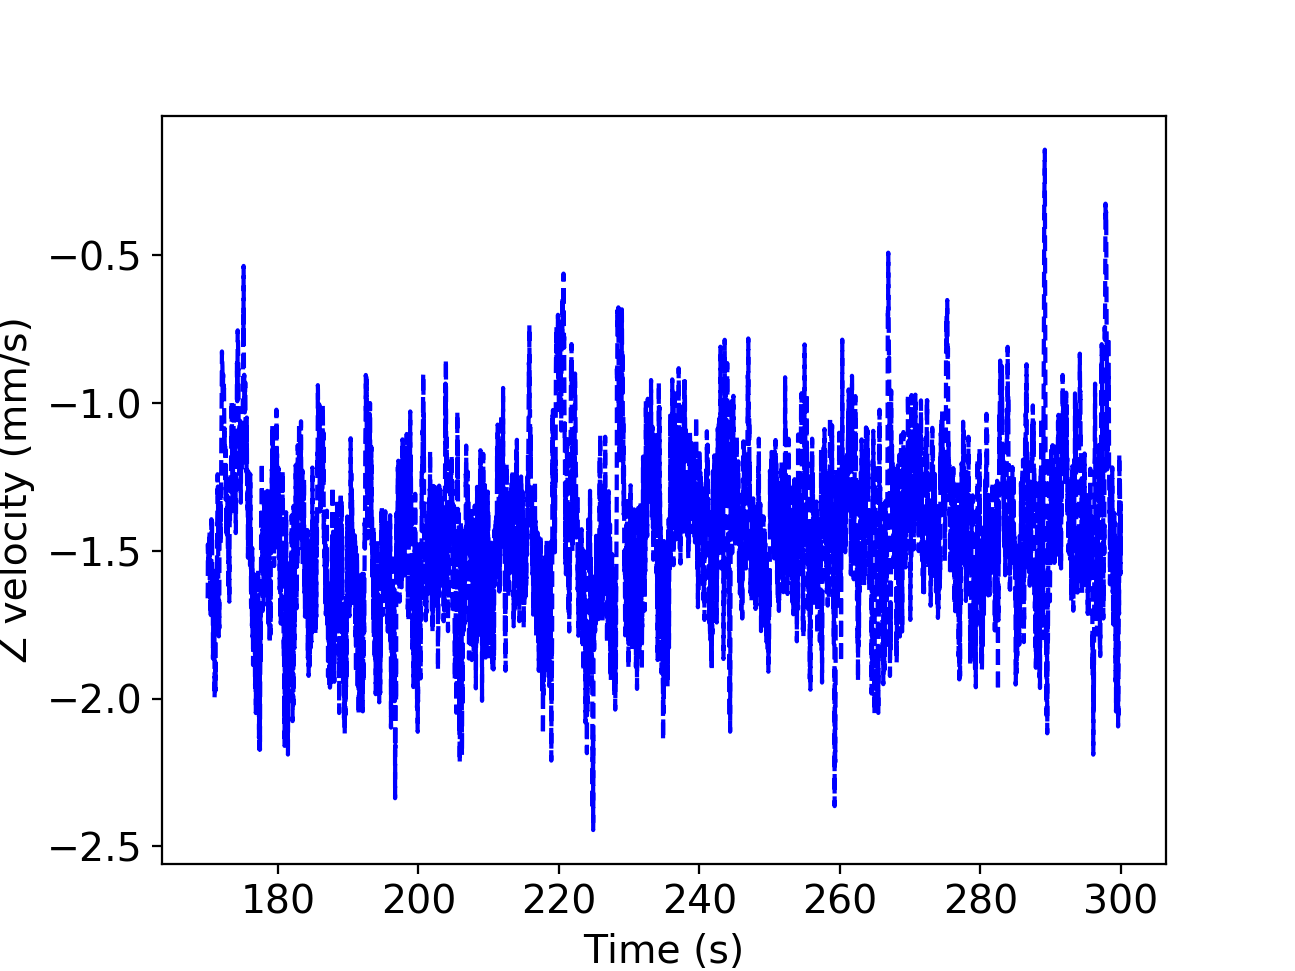

Text(0, 0.5, 'Z velocity (mm/s)')

In [320]:
import FigureParameters
imp.reload(FigureParameters)


# Organism depth vs Time
Time = track.T
X_pos = track.df['Xobjet']
Y_pos = track.df['Yobjet']
Z_pos = track.df['ZobjWheel']

plt.figure()

plt.plot(Time, Y_pos, color = 'g', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('Y position (mm)')



# Vertical velocity vs Time
plt.figure()

plt.plot(track.T, track.Vz_smooth, color = 'b', linestyle = '--')

plt.xlabel('Time (s)')
plt.ylabel('Z velocity (mm/s)')

In [321]:
# Shift the track positions based on the wall position
Y_pos = (Y_pos - min(Y_pos) + track.OrgDim/2)

<IPython.core.display.Javascript object>


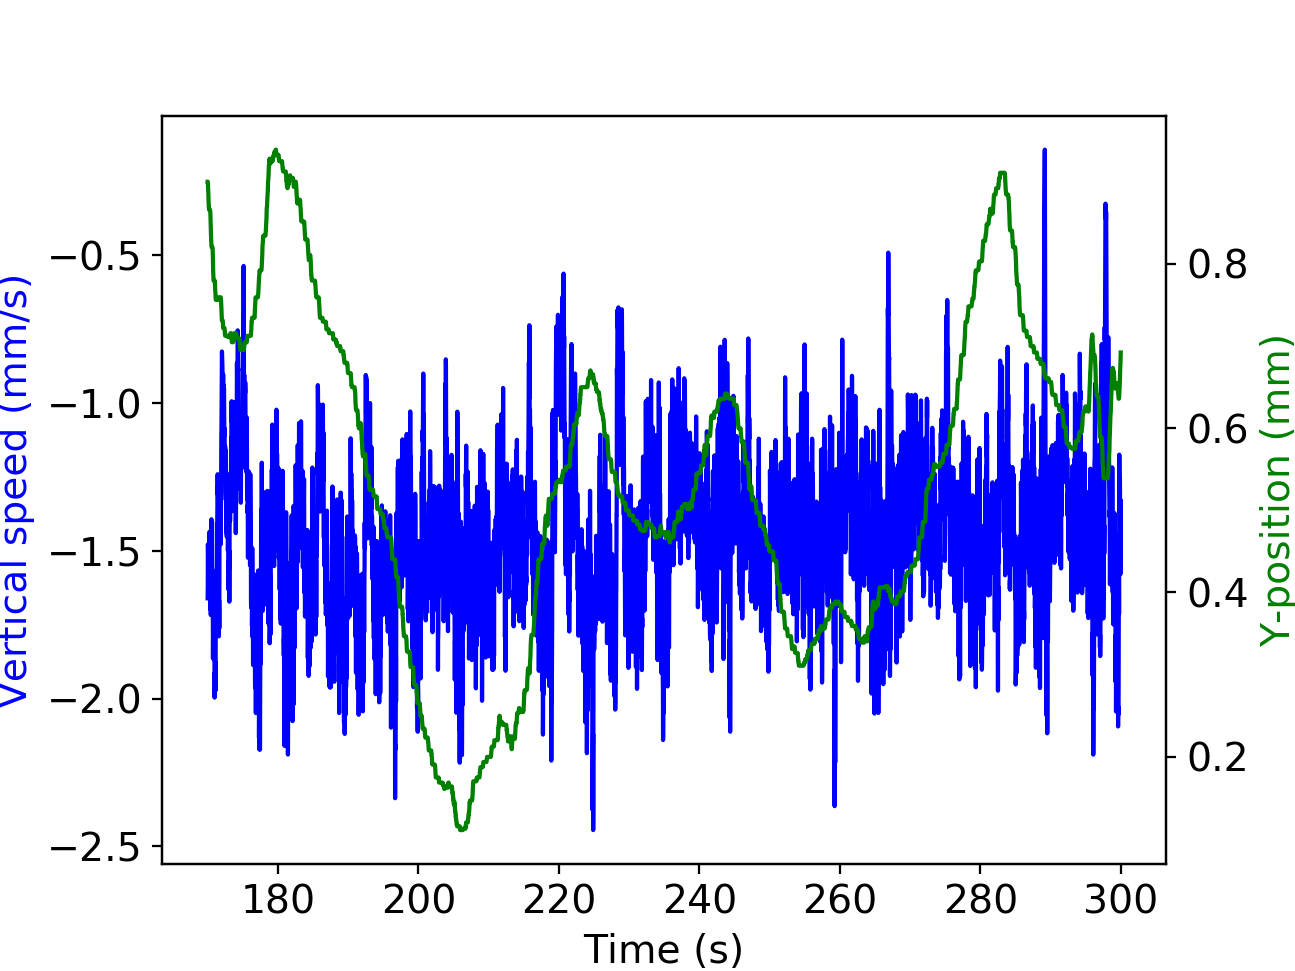

Text(0, 0.5, 'Y-position (mm)')

In [322]:
# Plot vertical velocity and distance from wall on the same plot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(track.T, track.Vz_smooth, 'b-')
ax2.plot(track.T, Y_pos, 'g-')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Vertical speed (mm/s)', color='b')
ax2.set_ylabel('Y-position (mm)', color='g')







# Plot the velocity components vs distance to wall to check for correlations

<IPython.core.display.Javascript object>


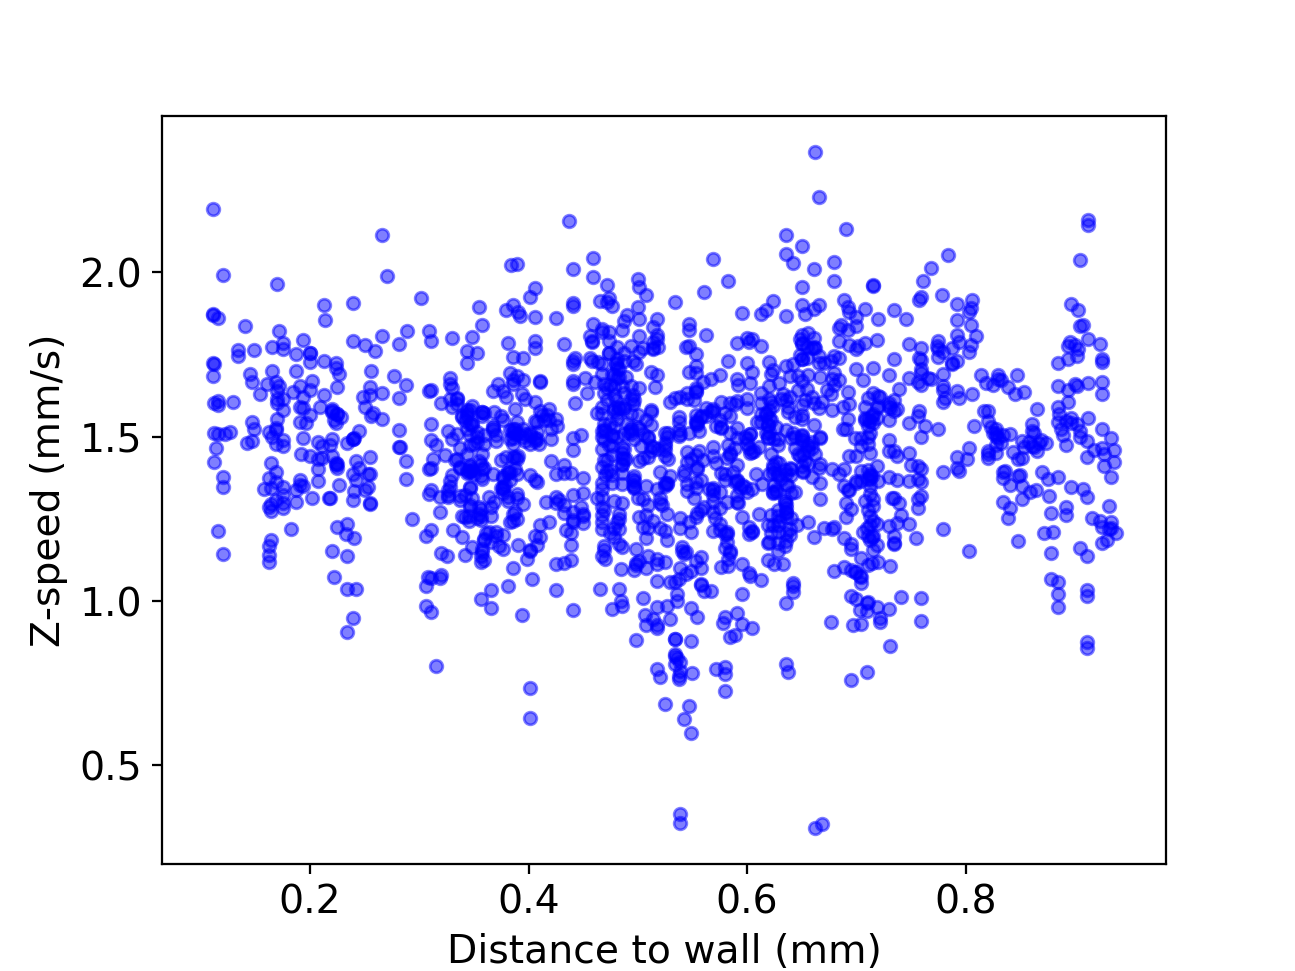

<IPython.core.display.Javascript object>


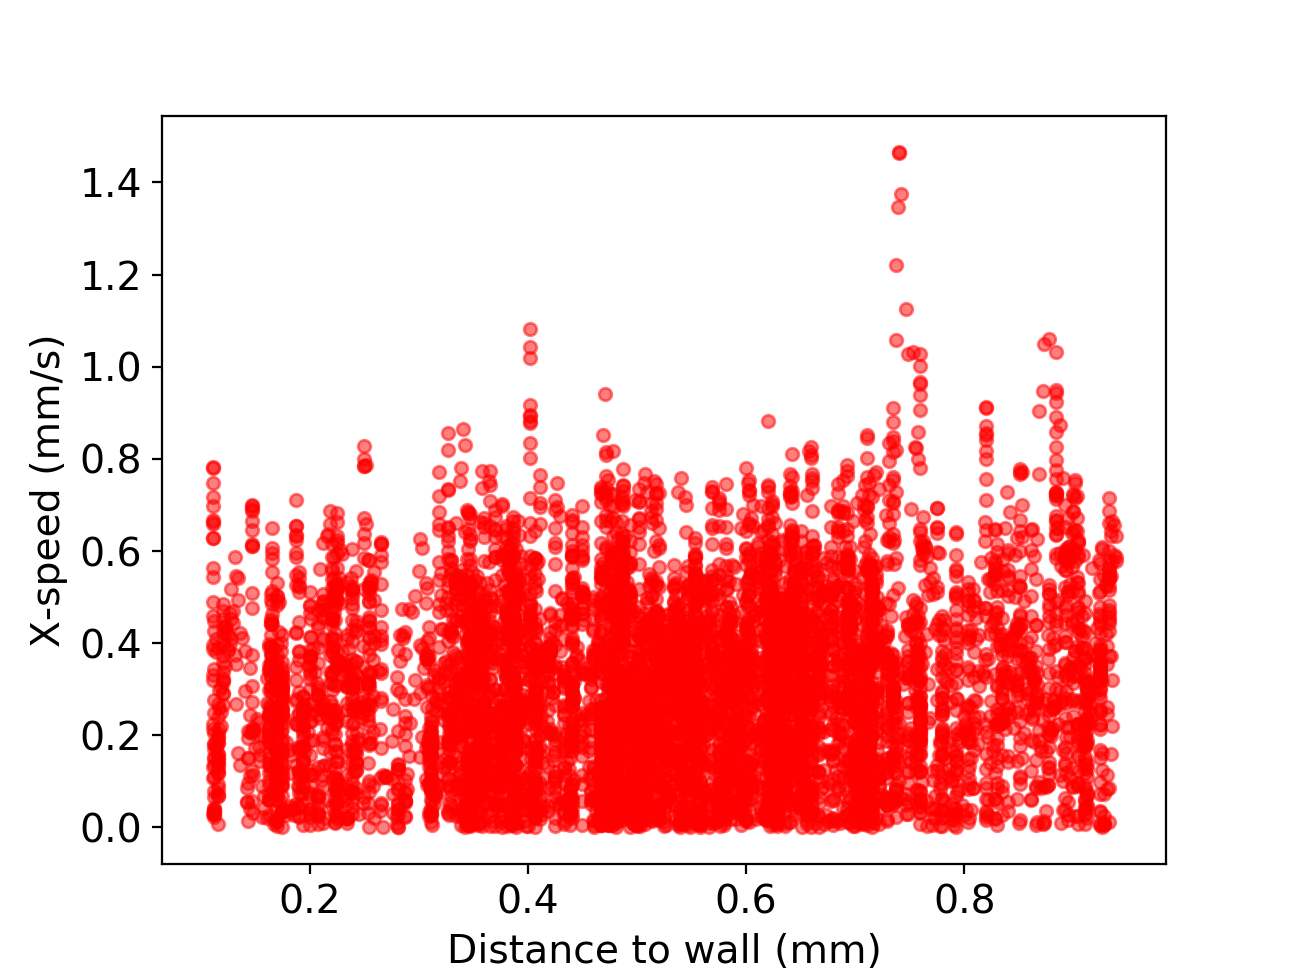

<IPython.core.display.Javascript object>


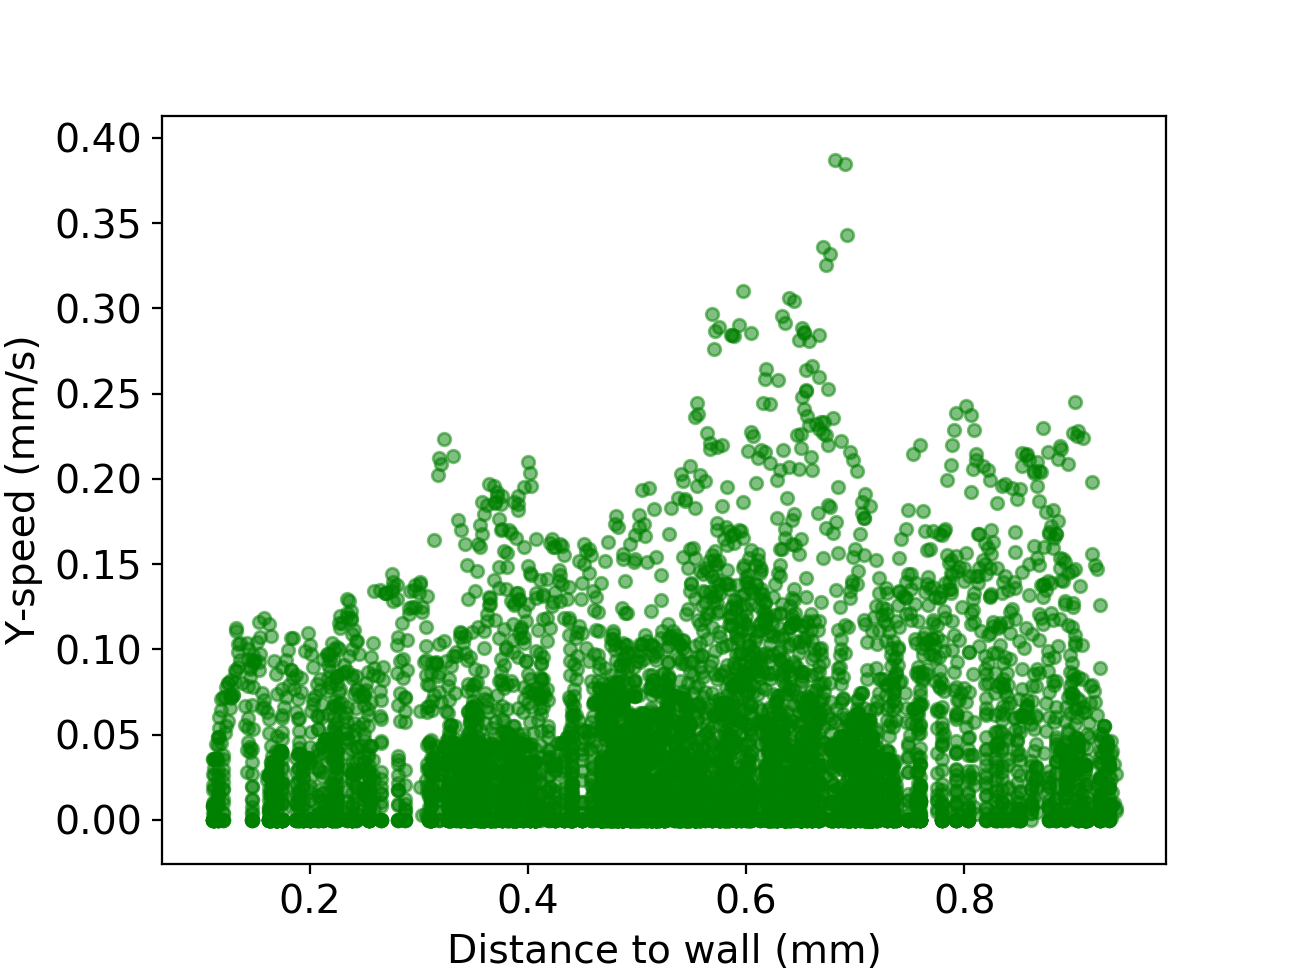

Text(0, 0.5, 'Y-speed (mm/s)')

In [324]:
# Distance to wall vs Vertical velocity
plt.figure()

plt.scatter(Y_pos[::5], abs(track.Vz_smooth[::5]), 20, 'b', alpha =0.5)

plt.xlabel('Distance to wall (mm)')
plt.ylabel('Z-speed (mm/s)')

# Distance to wall vs X-velocity
plt.figure()

plt.scatter(Y_pos, abs(track.Vx_smooth), 20, 'r', alpha =0.5)

plt.xlabel('Distance to wall (mm)')
plt.ylabel('X-speed (mm/s)')


# Distance to wall vs Y-velocity
plt.figure()

plt.scatter(Y_pos, abs(track.Vy_smooth), 20, 'g', alpha =0.5)

plt.xlabel('Distance to wall (mm)')
plt.ylabel('Y-speed (mm/s)')

# Dimensionless distance to wall vs Velocity

<IPython.core.display.Javascript object>


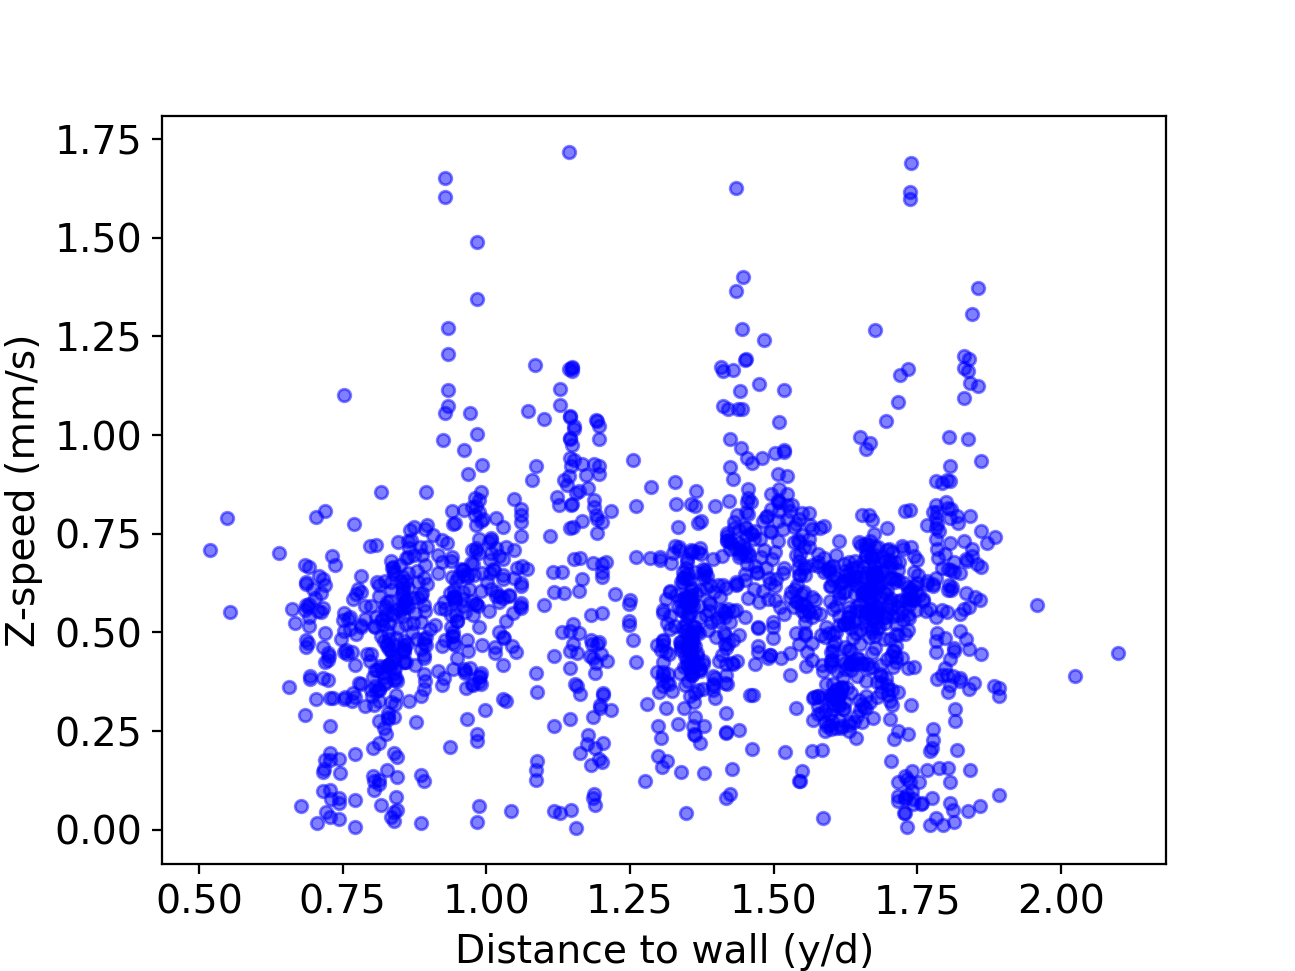

<IPython.core.display.Javascript object>


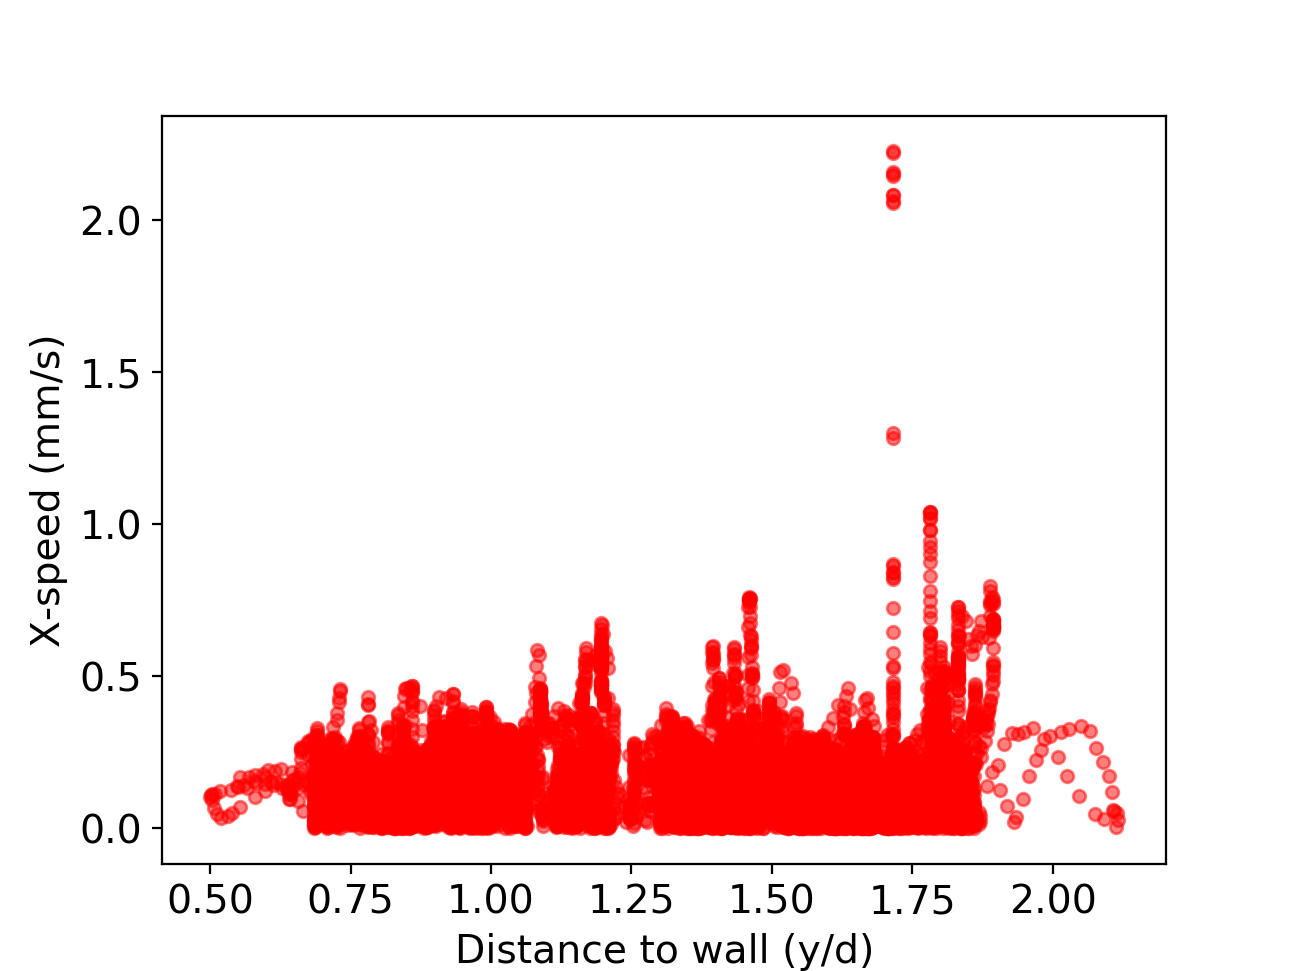

<IPython.core.display.Javascript object>


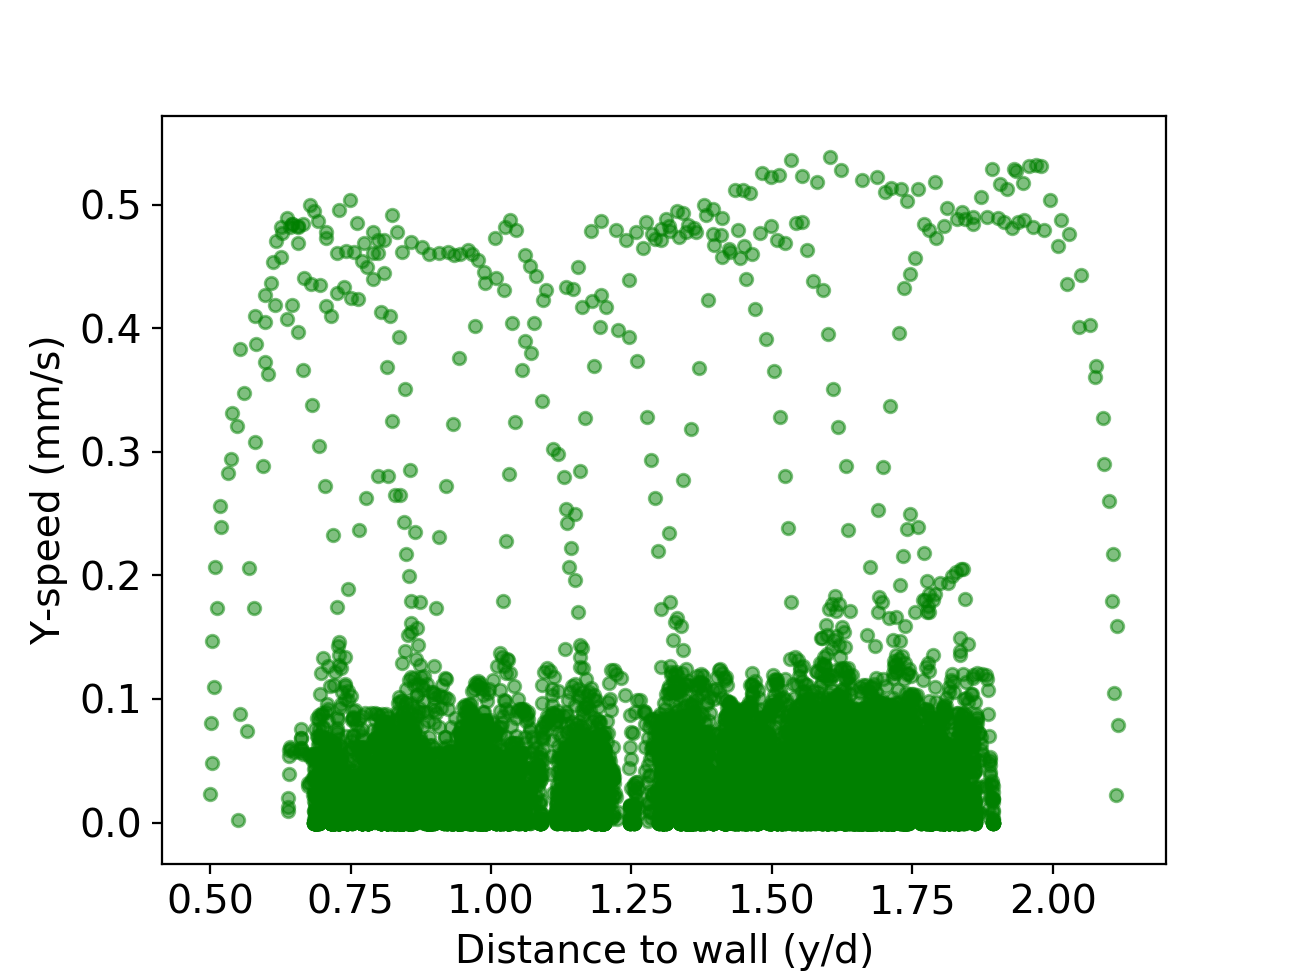

Text(0, 0.5, 'Y-speed (mm/s)')

In [302]:
# Dimensionless distance to wall vs Vertical velocity
plt.figure()

plt.scatter(Y_pos[::10]/track.OrgDim, abs(track.Vz_smooth[::10]), 20, 'b', alpha =0.5)

plt.xlabel('Distance to wall (y/d)')
plt.ylabel('Z-speed (mm/s)')

# Distance to wall vs X-velocity
plt.figure()

plt.scatter(Y_pos/track.OrgDim, abs(track.Vx_smooth), 20, 'r', alpha =0.5)

plt.xlabel('Distance to wall (y/d)')
plt.ylabel('X-speed (mm/s)')


# Distance to wall vs Y-velocity
plt.figure()

plt.scatter(Y_pos/track.OrgDim, abs(track.Vy_smooth), 20, 'g', alpha =0.5)

plt.xlabel('Distance to wall (y/d)')
plt.ylabel('Y-speed (mm/s)')

# Calculate correlation between velocity and wall separation

In [295]:
from scipy.stats import pearsonr


corr_Z_velocity, p_value_z = pearsonr(Y_pos, abs(track.Vz_smooth))

print('Z-swimming speed vs wall separation \n Pearsons correlation: {}, P-value: {}'.format(corr_Z_velocity, p_value_z))
      
corr_Y_velocity, p_value_y = pearsonr(Y_pos, abs(track.Vy_smooth))
print('Y-swimming speed vs wall separation \n Pearsons correlation: {}, P-value: {}'.format(corr_Y_velocity, p_value_y))
      
corr_X_velocity, p_value_x = pearsonr(Y_pos, abs(track.Vx_smooth))
print('X-swimming speed vs wall separation \n Pearsons correlation: {}, P-value: {}'.format(corr_X_velocity, p_value_x))


Z-swimming speed vs wall separation 
 Pearsons correlation: 0.12977080193056156, P-value: 8.229376174689568e-55
Y-swimming speed vs wall separation 
 Pearsons correlation: 0.04546618144746818, P-value: 5.2527719967088445e-08
X-swimming speed vs wall separation 
 Pearsons correlation: 0.04986026572160933, P-value: 2.3848497680594398e-09


In [ ]:
# Marine snow correlations
Z-speed vs wall separation 
 Pearsons correlation: 0.38122750633595487, P-value: 0.0
Y-speed vs wall separation 
 Pearsons correlation: -0.0029579718599410795, P-value: 0.16246990838341688
X-speed vs wall separation 
 Pearsons correlation: -0.2144161717837186, P-value: 0.0
            
%---------------------------------------------------------------------------------
        
# Polychaete-2 (0-60 s)
Z-swimming speed vs wall separation 
 Pearsons correlation: -0.07901089697131211, P-value: 0.0012783807481726815
Y-swimming speed vs wall separation 
 Pearsons correlation: -0.09452623824169973, P-value: 0.00011532072957032139
X-swimming speed vs wall separation 
 Pearsons correlation: -0.051951184478296615, P-value: 0.034357697619258956
            
            
# Polychaete-3 (0-34 s)
Z-swimming speed vs wall separation 
 Pearsons correlation: 0.3838122870310221, P-value: 1.711684141562315e-68
Y-swimming speed vs wall separation 
 Pearsons correlation: -0.018753332475239165, P-value: 0.4112504347484525
X-swimming speed vs wall separation 
 Pearsons correlation: 0.19261841365795568, P-value: 1.610620787246411e-17

# Polychaete-4 (0-54s)
Z-swimming speed vs wall separation 
 Pearsons correlation: 0.024895202395550313, P-value: 0.1670547254712927
Y-swimming speed vs wall separation 
 Pearsons correlation: 0.017876815492845536, P-value: 0.3211381402316307
X-swimming speed vs wall separation 
 Pearsons correlation: -0.09948381818439969, P-value: 3.122716849076236e-08

            
# Polychaete 6 (175-300s)
Z-swimming speed vs wall separation 
 Pearsons correlation: -0.005599975607593363, P-value: 0.6307490140227685
Y-swimming speed vs wall separation 
 Pearsons correlation: 0.12054394860151908, P-value: 2.911667712822566e-25
X-swimming speed vs wall separation 
 Pearsons correlation: 0.10225633347704323, P-value: 1.3662132656985423e-18
            

# Starfish-6 (0-600s)
Z-swimming speed vs wall separation 
 Pearsons correlation: 0.06562832119635414, P-value: 7.41503365144611e-16
Y-swimming speed vs wall separation 
 Pearsons correlation: 0.014340430074090159, P-value: 0.07838390753984643
X-swimming speed vs wall separation 
 Pearsons correlation: 0.007305561221817903, P-value: 0.3699064001414705
            
            
# Snail-1 (0-550 s)
Z-swimming speed vs wall separation 
 Pearsons correlation: 0.2192133428868634, P-value: 0.0
Y-swimming speed vs wall separation 
 Pearsons correlation: -0.17272547359265597, P-value: 1.7329250330041864e-229
X-swimming speed vs wall separation 
 Pearsons correlation: 0.24134727037101059, P-value: 0.0
            

[-0.0051968   1.45575321]
Slope (1/s): -0.005196803015623319


<IPython.core.display.Javascript object>


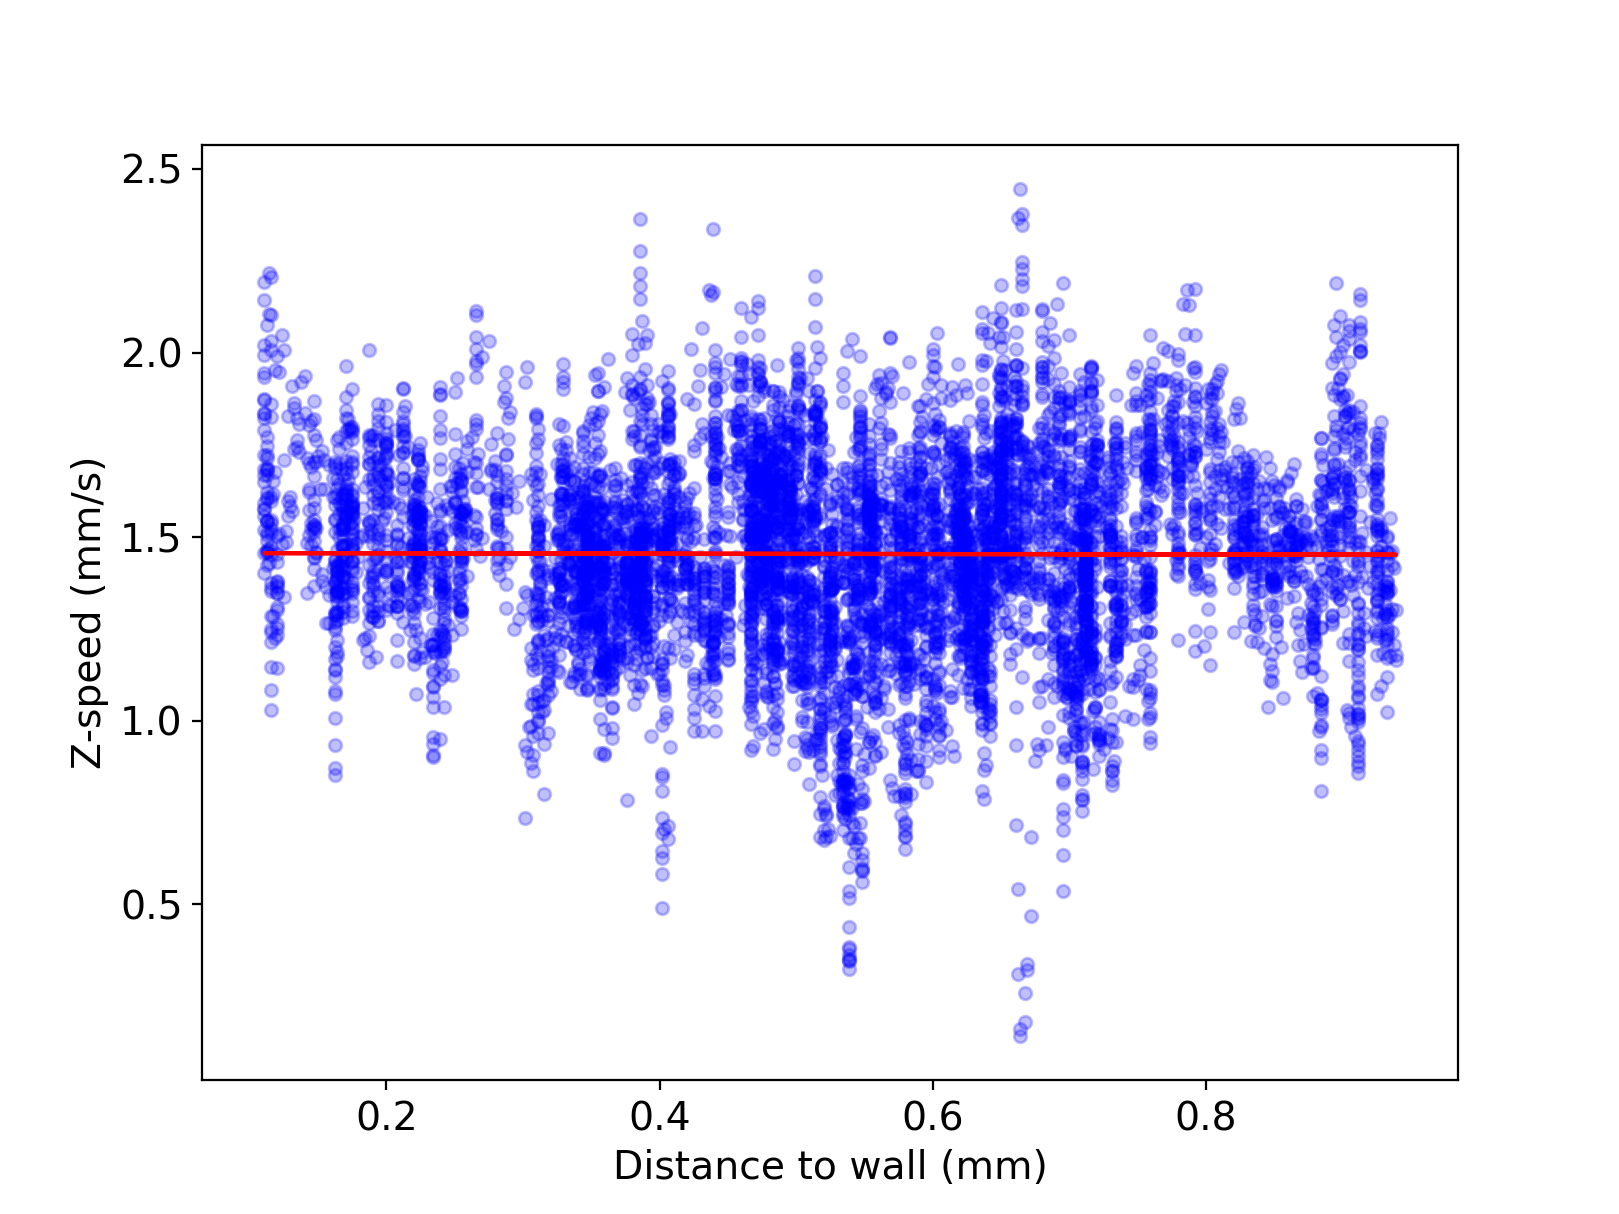

In [325]:
# Fit a line to the vertical velocity vs wall distance data
import numpy as np
import matplotlib.pyplot as plt

p = np.polyfit(Y_pos, abs(track.Vz_smooth), deg = 1)

print(p)

print('Slope (1/s): {}'.format(p[0]))

plt.figure(figsize = (8,6))

plt.scatter(Y_pos, abs(track.Vz_smooth), 20, 'b', alpha =0.25)
plt.plot(Y_pos, p[0]*Y_pos + p[1], 'r-')
plt.xlabel('Distance to wall (mm)')
plt.ylabel('Z-speed (mm/s)')

plt.savefig('Z_velocity_vs_wall_separation' + Organism + '.png', dpi =300)
plt.savefig('Z_velocity_vs_wall_separation' + Organism + '.svg', dpi=150)

In [ ]:
# Slope of Z-speed vs Distance to wall

#Marine snow
[0.28251801 1.87641177]
Slope (1/s): 0.2825180076927673
    
#Starfish-6
[0.03761339 0.49419755]
Slope (1/s): 0.0376133851106521

# Snail-1
[0.1490951  0.45142195]
Slope (1/s): 0.1490951013437892

# Calculate the amplitude of the helical trajectories

<IPython.core.display.Javascript object>


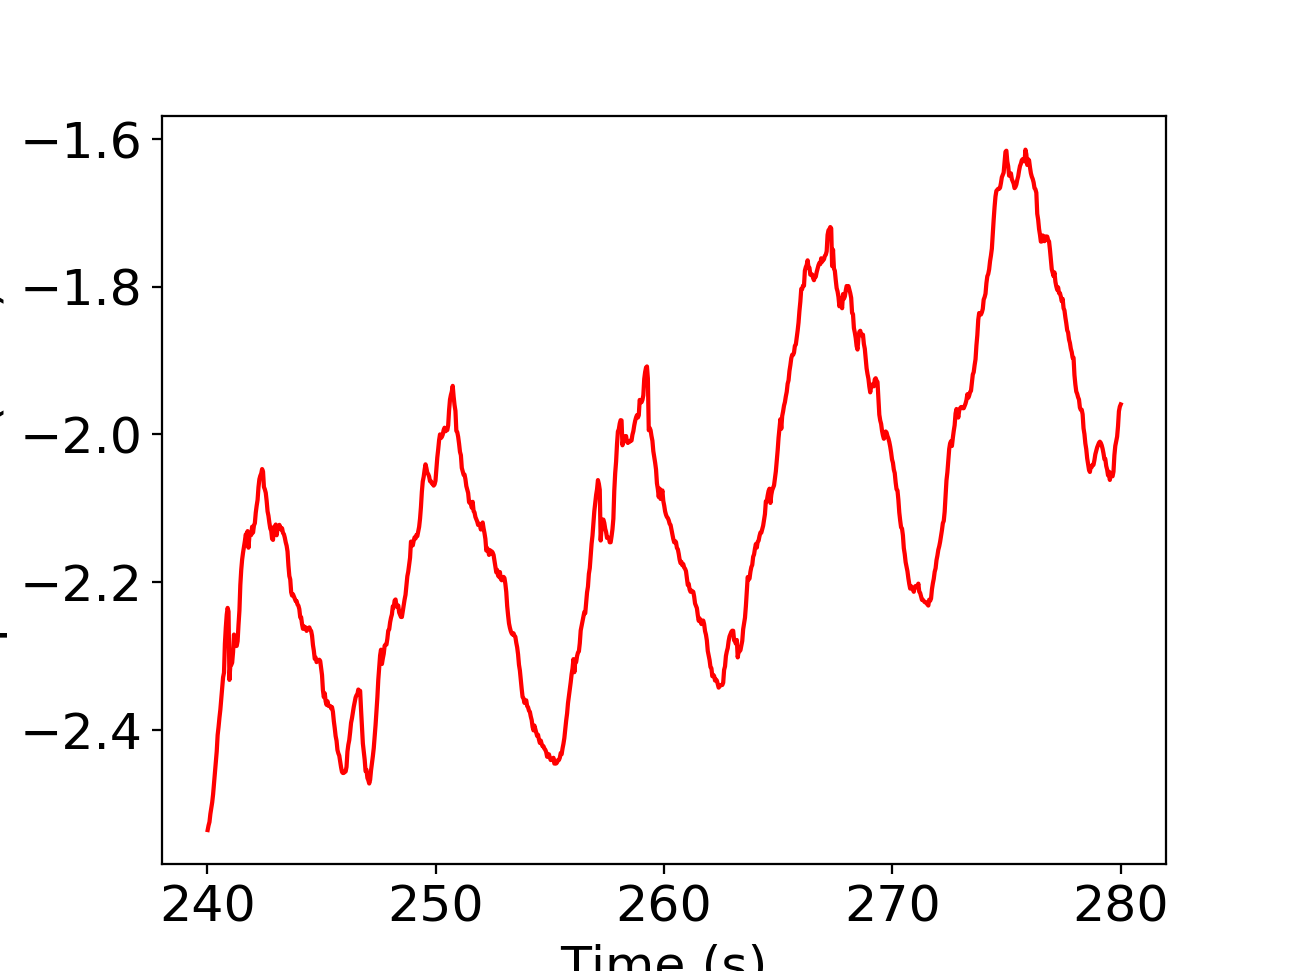

Text(0, 0.5, 'X position (mm)')

In [219]:
# Organism radial location vs Time
Time = track.T
X_pos = track.df['Xobjet']

plt.figure()

plt.plot(Time, X_pos, color = 'r', linestyle = '-')
plt.xlabel('Time (s)')
plt.ylabel('X position (mm)')

In [222]:
# Subtract the slower varying components by applying a low-pass filter
avg_window = 30

X_pos_slow = track.smoothSignal(track.X, avg_window)
X_pos_fast = X_pos - X_pos_slow

<IPython.core.display.Javascript object>


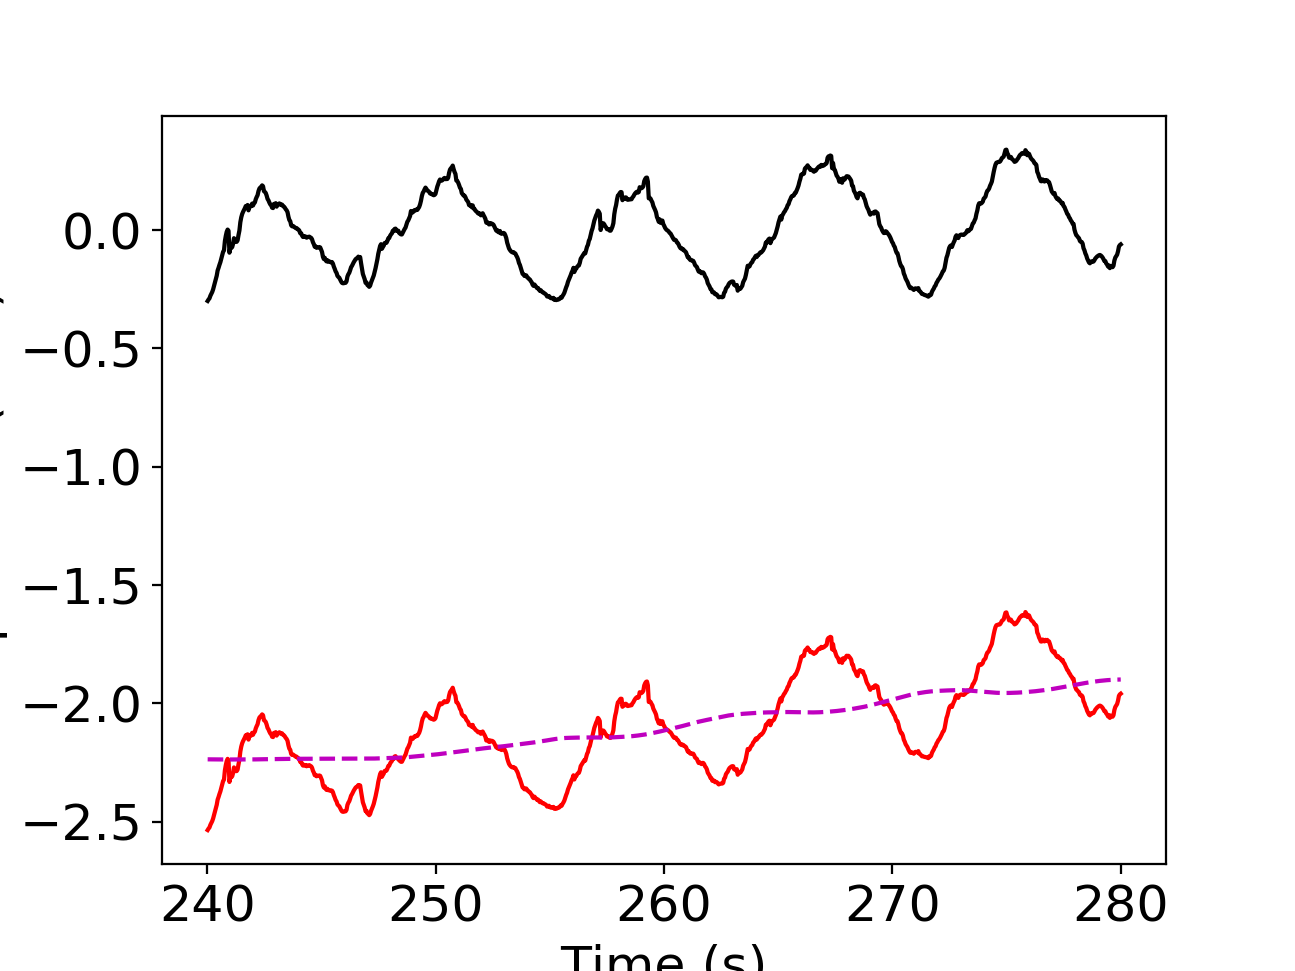

Text(0, 0.5, 'X position (mm)')

In [223]:
# Organism radial location vs Time

plt.figure()

plt.plot(Time, X_pos, color = 'r', linestyle = '-')
plt.plot(Time, X_pos_slow, color = 'm', linestyle = '--')
plt.plot(Time, X_pos_fast, color = 'k', linestyle = '-')
plt.xlabel('Time (s)')
plt.ylabel('X position (mm)')

In [228]:
# Calculate the amplitude of the helical trajectory by fitting a sine function
import scipy.optimize as opt

def sine_function(x,freq,ampl, phase, slope ,offset):
    return ampl*np.sin(2*np.pi*freq*x + phase)+offset + slope*x


    
data_param, data_stat = opt.curve_fit(sine_function, Time, X_pos_fast,[0.1,1, np.pi, 0, 0],bounds=((0,0, -np.pi, -np.inf, -np.inf),(np.inf,np.inf, np.pi, np.inf, np.inf)))

print('Fit parameters \n Frequency: {} Hz, Amplitude :{} mm'.format(data_param[0], data_param[1]))

X_pos_fast_fit = [sine_function(time, data_param[0], data_param[1], data_param[2], data_param[3], data_param[4]) for time in Time]


# Estimate amplitude using std
print(np.mean(X_pos_fast))
signal_std = np.std(X_pos_fast)

print('Std dev in fast signal: {} mm'.format(signal_std))

print('Estimated amplitude: {} mm'.format(2*2**(1/2)*signal_std))

Fit parameters 
 Frequency: 0.10371575865293668 Hz, Amplitude :0.10163174084222878 mm
-0.000695546807460323
Std dev in fast signal: 0.16812575812840205 mm
Estimated amplitude: 0.47553145465888963 mm


<IPython.core.display.Javascript object>


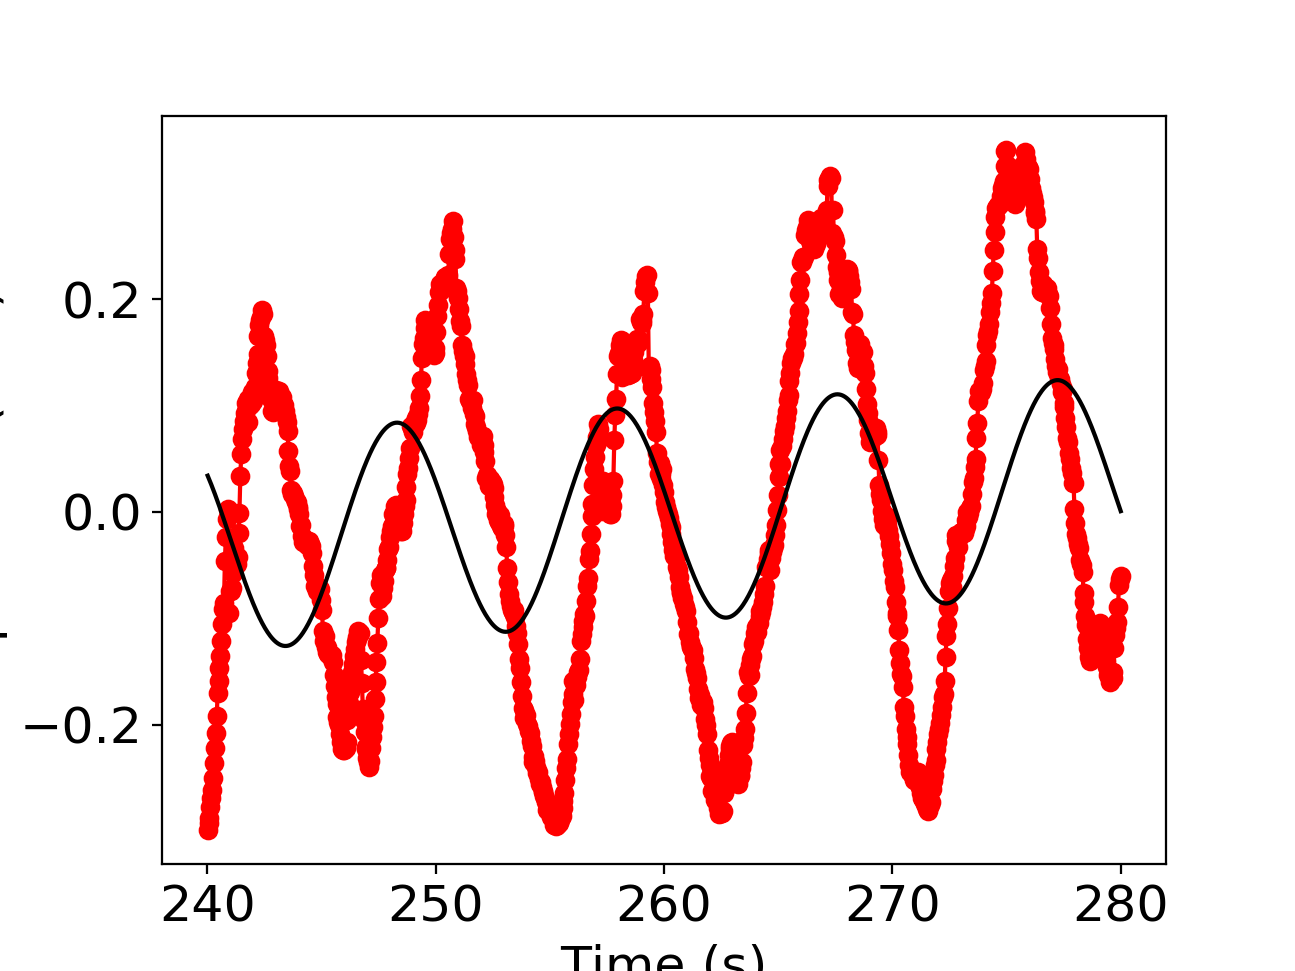

Text(0, 0.5, 'X position (mm)')

In [225]:
# Plot the fit on top of the original data
plt.figure()

plt.plot(Time, X_pos_fast, color = 'r', marker='o')
plt.plot(Time, X_pos_fast_fit, color = 'k', linestyle = '-')

plt.xlabel('Time (s)')
plt.ylabel('X position (mm)')


# Velocity statistics before and after wall interaction events

<IPython.core.display.Javascript object>


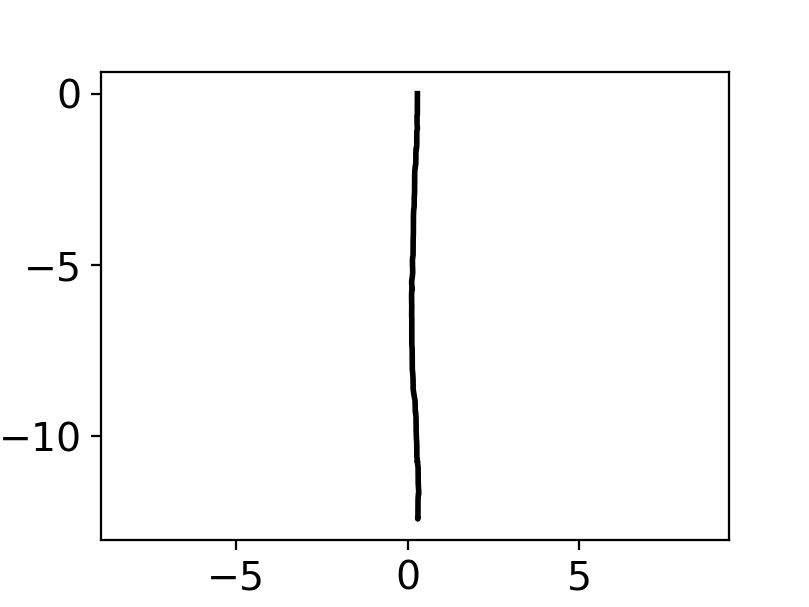

<IPython.core.display.Javascript object>


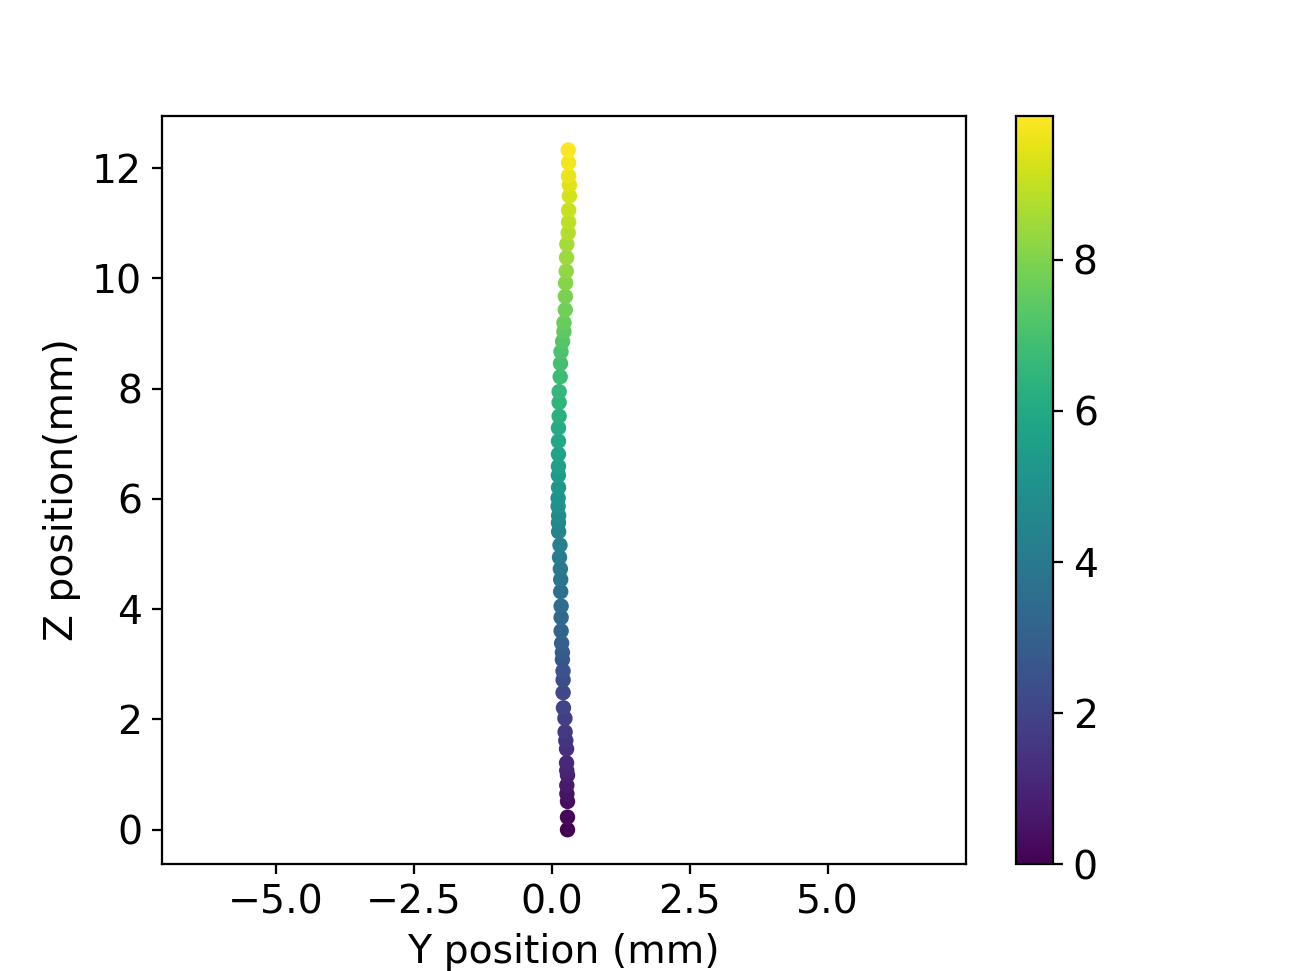

In [105]:
# Plot the trajectory in the YZ plane during wall interaction
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(4,3))

plt.plot(Y_pos, Z_pos, color = 'k', linewidth = 2)
plt.axis('equal')

plt.xlabel('Y position (mm)')
plt.ylabel('Z position(mm)')

# plt.savefig('YZ_track_Polychaete6_FullTrack_equalscale.png', dpi=300)
# plt.savefig('YZ_track_Polychaete6_FullTrack_equalscale.svg', dpi=150)


# Unequal axis scale
plt.figure()
track.T = track.T - track.T[0]
fig = plt.scatter(Y_pos[::10], -Z_pos[::10], s = 20, c = track.T[::10])

ratio = 1
ax = plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*ratio)
plt.xlim(0,5)
plt.xlabel('Y position (mm)')
plt.ylabel('Z position(mm)')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
plt.axis('equal')

plt.colorbar(fig)

plt.savefig('YZ_track_'+Organism+'_wallInteraction.png', dpi=300)
plt.savefig('YZ_track_'+Organism+'_wallInteraction.svg', dpi=150)


In [269]:
print(track.OrgDim)

None


# Effect of walls on velocity orientation 

In [234]:
Vx, Vy, Vz = track.Vx_smooth, track.Vy_smooth, track.Vz_smooth

Swimming_speed = (Vx**2 + Vy**2 + Vz**2)**(1/2)
        
Orientation_vectors = np.zeros((3, len(Vx)))

Orientation_vectors[0,:] = Vx/Swimming_speed
Orientation_vectors[1,:] = Vy/Swimming_speed
Orientation_vectors[2,:] = Vz/Swimming_speed

# Extract the orientation angle from the vertical

Z_gravity = [0, 0, 1]

cos_theta = Orientation_vectors[0,:]*Z_gravity[0] + Orientation_vectors[1,:]*Z_gravity[1] + Orientation_vectors[2,:]*Z_gravity[2]

# Theta value in degrees
theta_array = np.arccos(cos_theta)*(180/(np.pi))



## Plot a polar histogram of velocity orientation relative to gravity

<IPython.core.display.Javascript object>


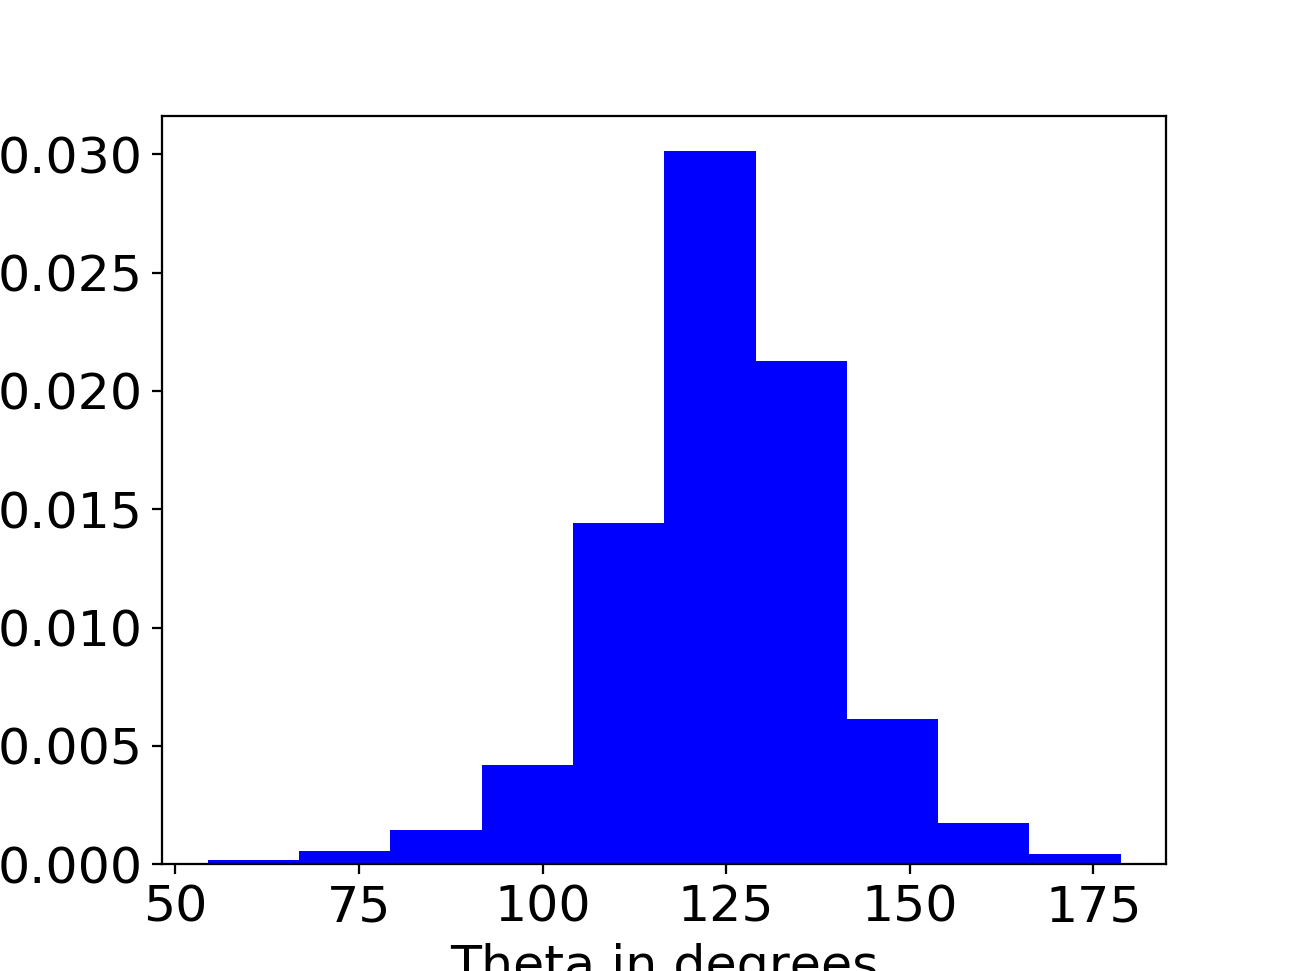

<IPython.core.display.Javascript object>


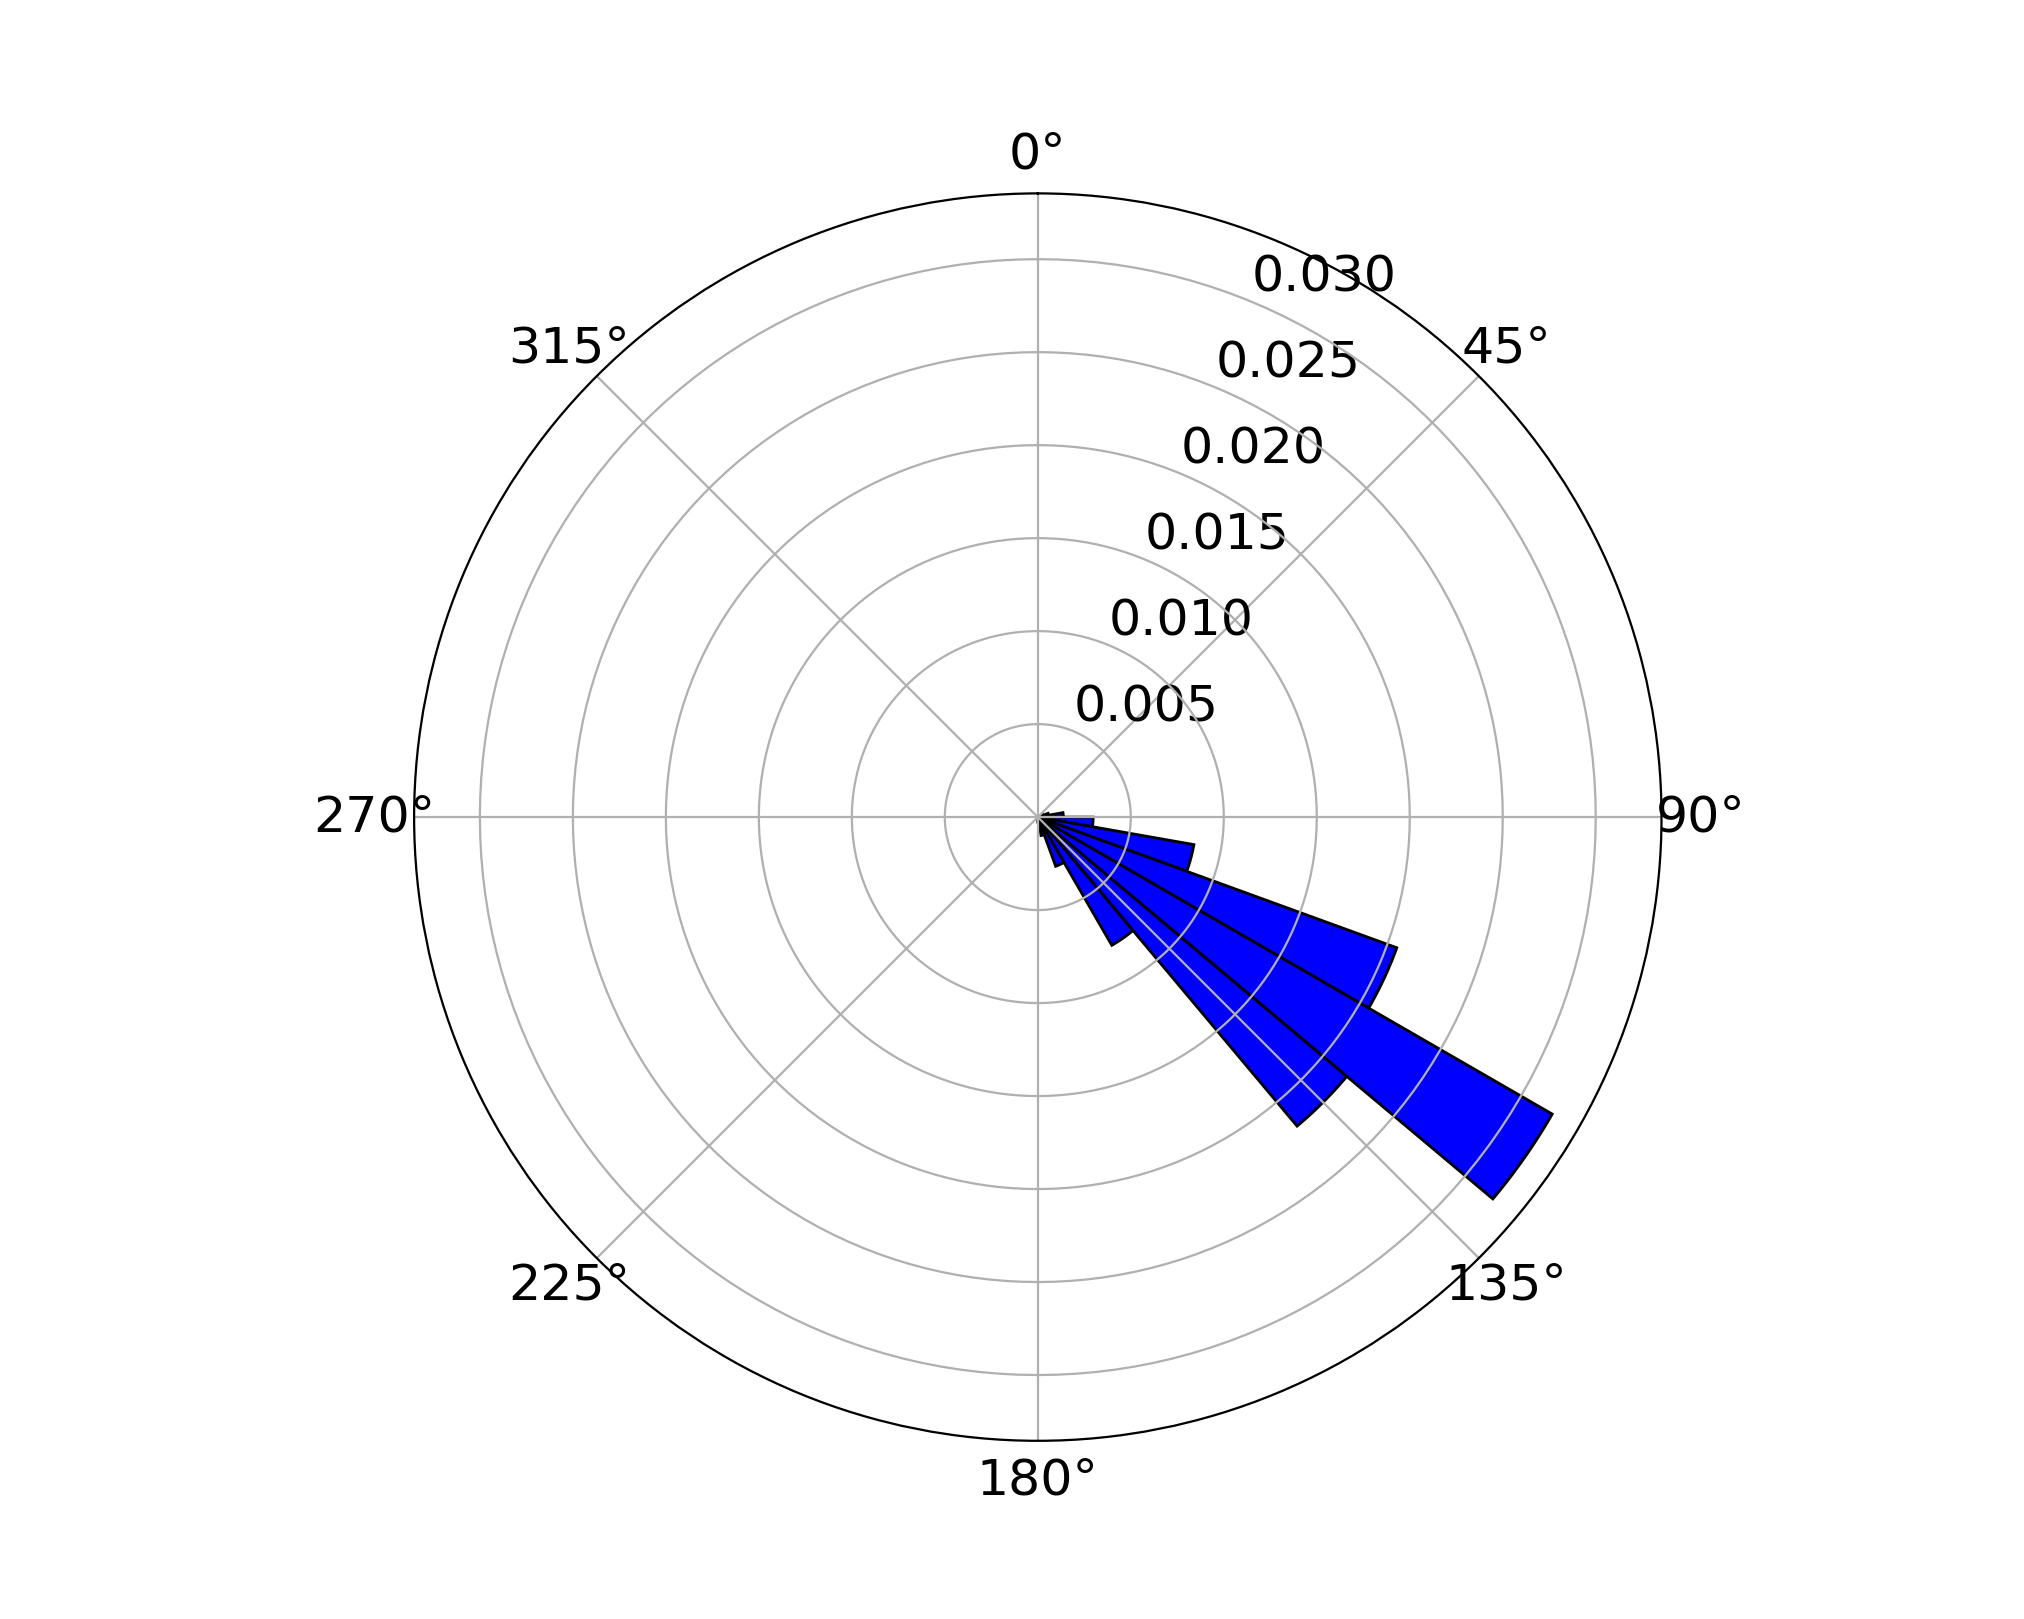

In [418]:
bin_size = 10
        
a , b = np.histogram(theta_array, bins=np.arange(0, 180 + bin_size, bin_size), density = True)

centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])


plt.figure()
plt.hist(theta_array, density=True, color = 'b')
plt.xlabel('Theta in degrees')
plt.show()


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='b', edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

## Plot velocity orientation vs distance from wall

<IPython.core.display.Javascript object>


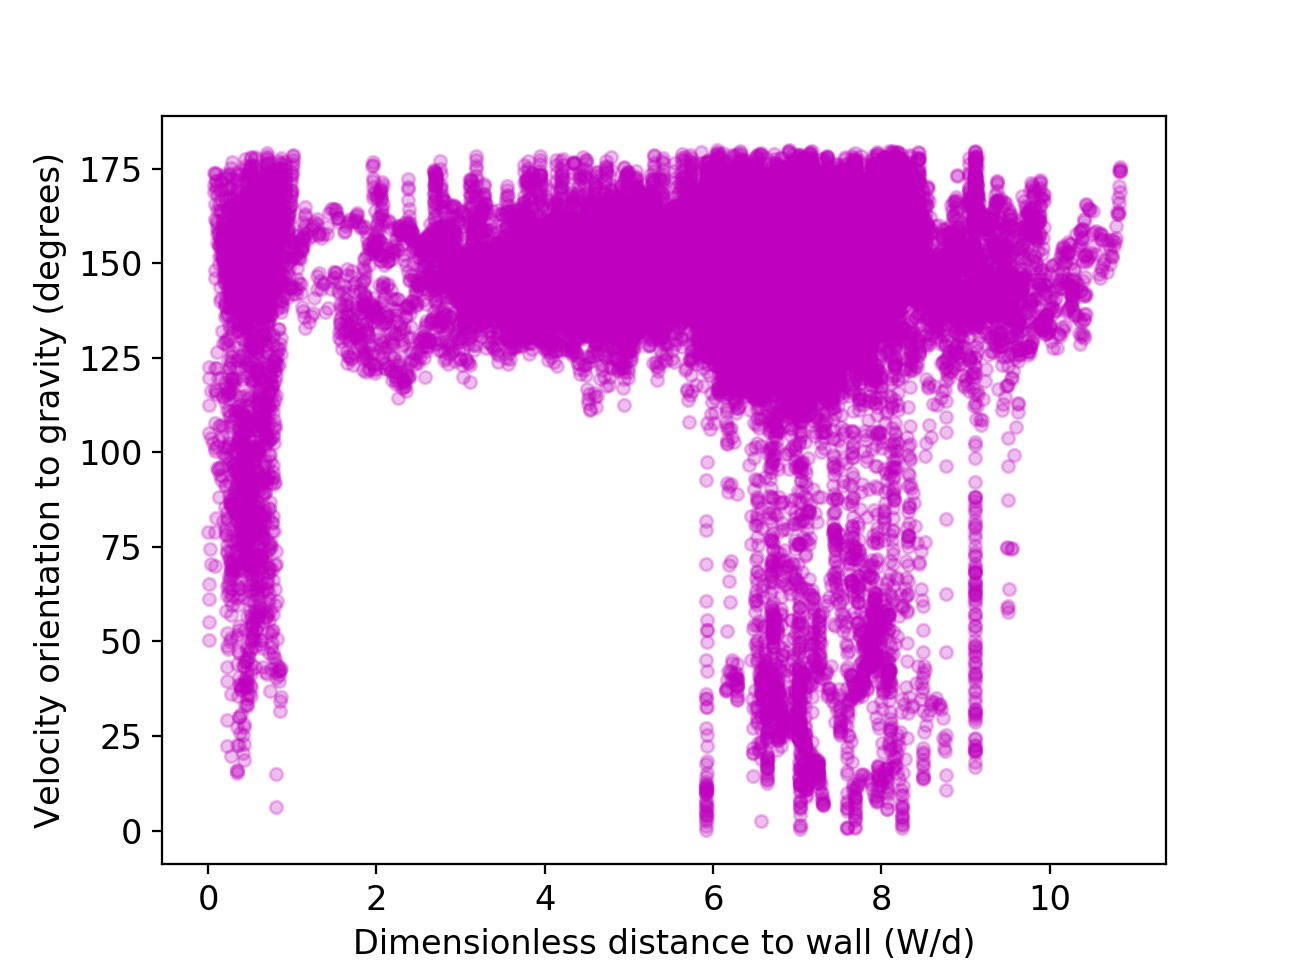

In [409]:
from matplotlib import rcParams
from matplotlib import rc
#rcParams['axes.titlepad'] = 20 
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
### for Palatino and other serif fonts use:
##rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=False)
#plt.rc('font', family='serif')

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

saveFile = 'VelocityOrientation_vs_DimensionlessWallDistance'
plt.figure()

plt.scatter(Y_pos/track.OrgDim, theta_array, 20, 'm', alpha =0.25)

plt.xlabel('Dimensionless distance to wall (W/d)')
plt.ylabel('Velocity orientation to gravity (degrees)')

plt.savefig(saveFile + '_'+ track.Organism +'.png', dpi=300)
plt.savefig(saveFile + '_'+ track.Organism +'.svg', dpi=150)

## Plot the polar histogram with data separated into bins "near wall" and "away from wall"

In [255]:
chamberWidth = 4

print(track.OrgDim)

nearWall = np.logical_or((Y_pos/track.OrgDim) < 2, ((abs(Y_pos - chamberWidth)/track.OrgDim) < 2))
awayWall = ~nearWall

0.22170685810647955


<IPython.core.display.Javascript object>


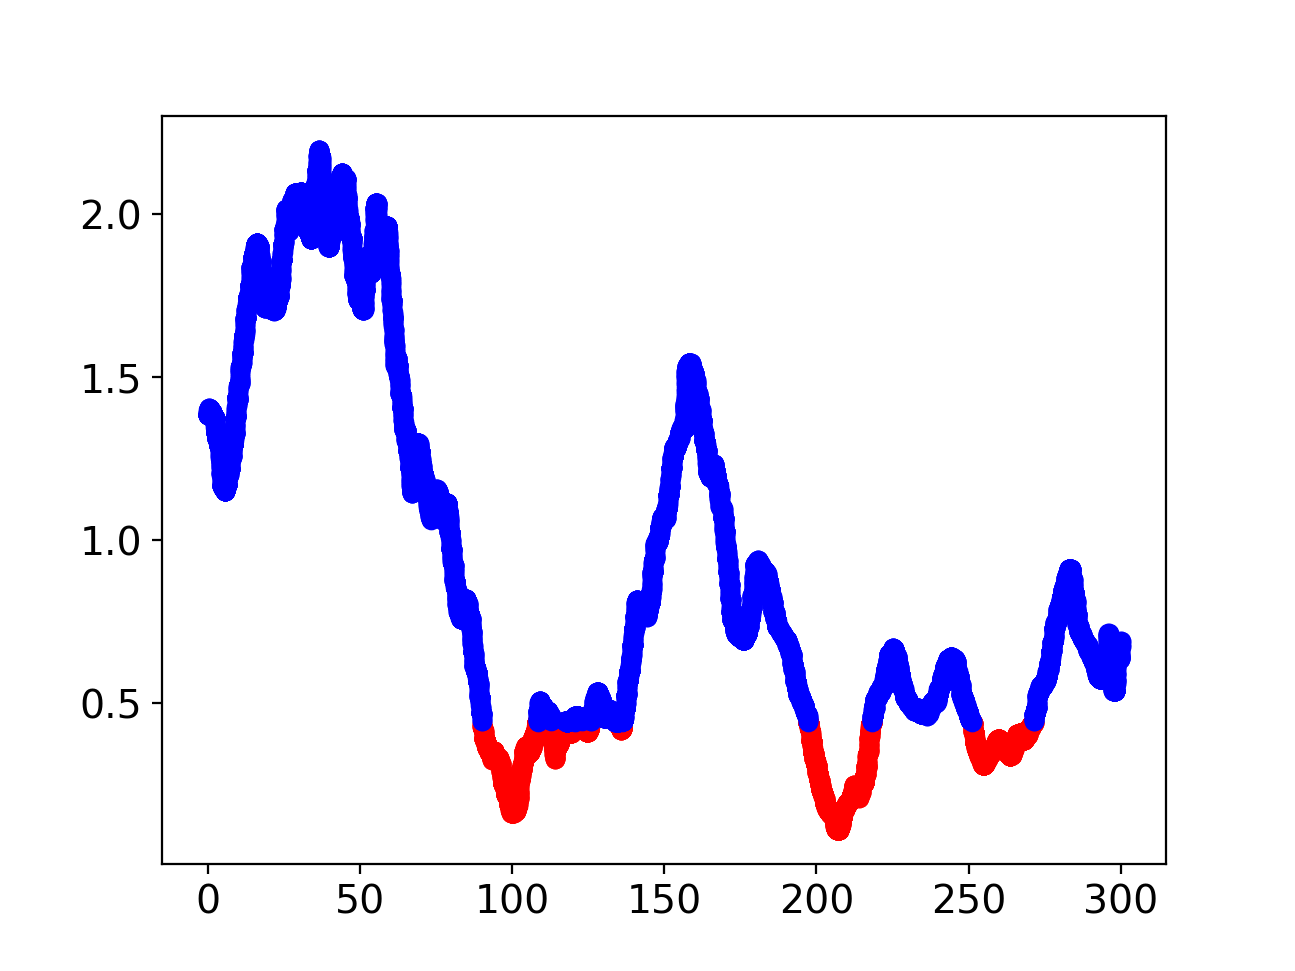

In [256]:
# Plot track segments near and away from wall

plt.figure()
plt.plot(Time[nearWall], Y_pos[nearWall], 'ro')
plt.plot(Time[awayWall], Y_pos[awayWall], 'bo')

<IPython.core.display.Javascript object>


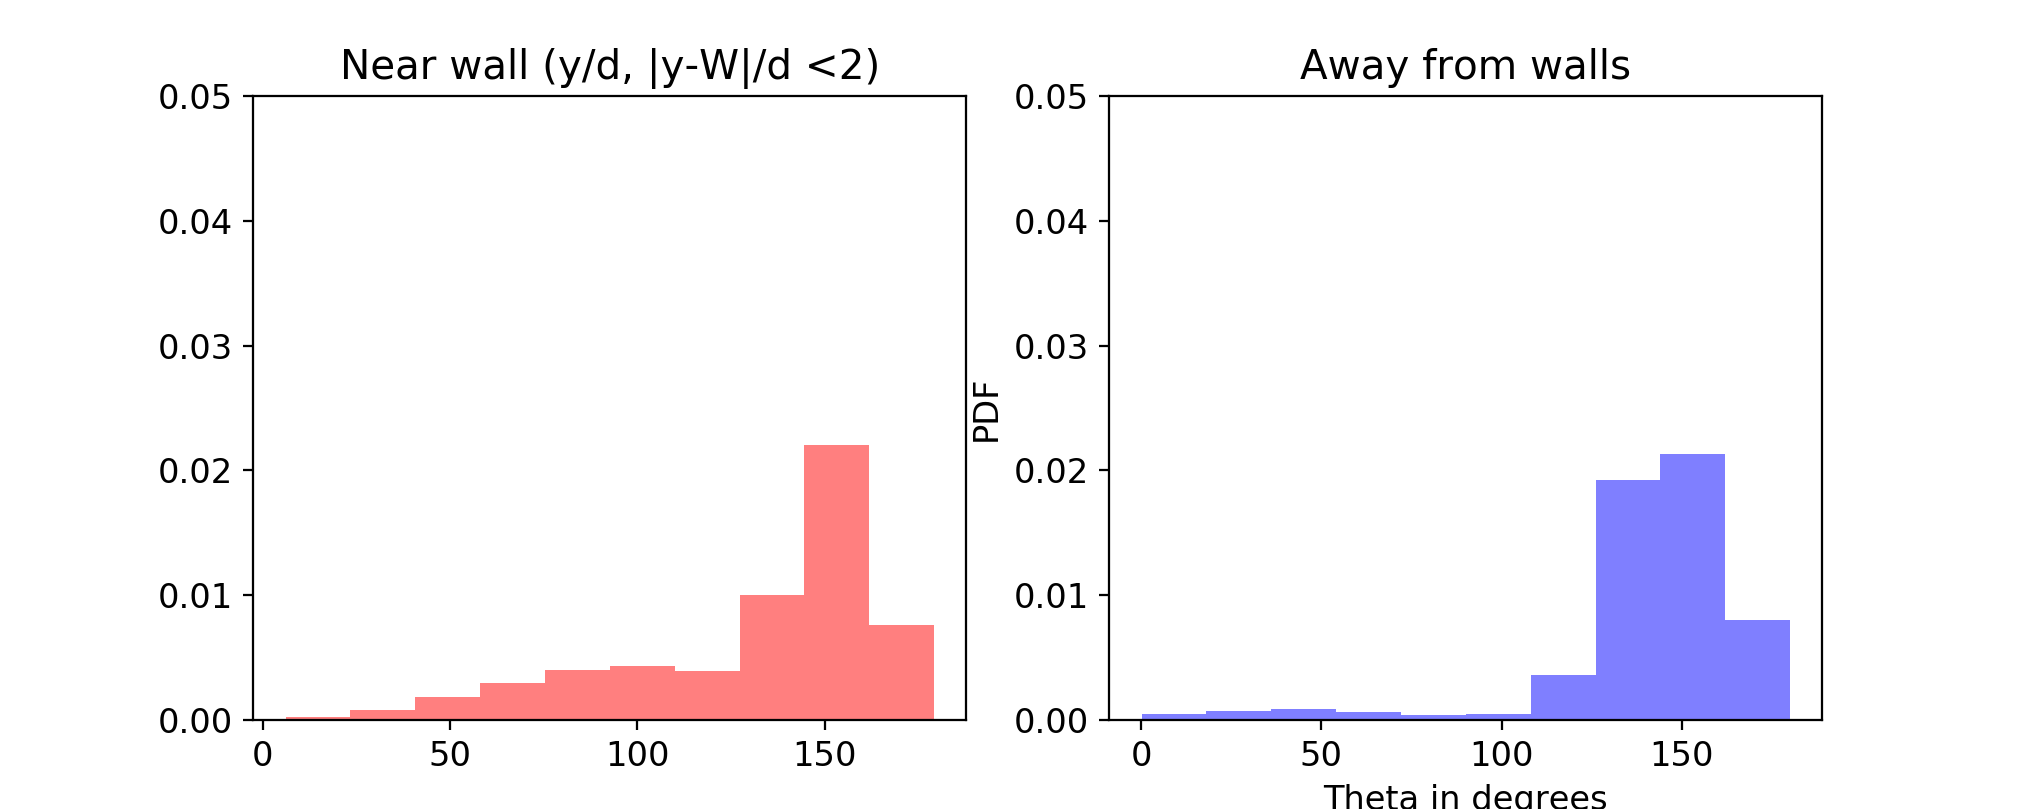

<IPython.core.display.Javascript object>


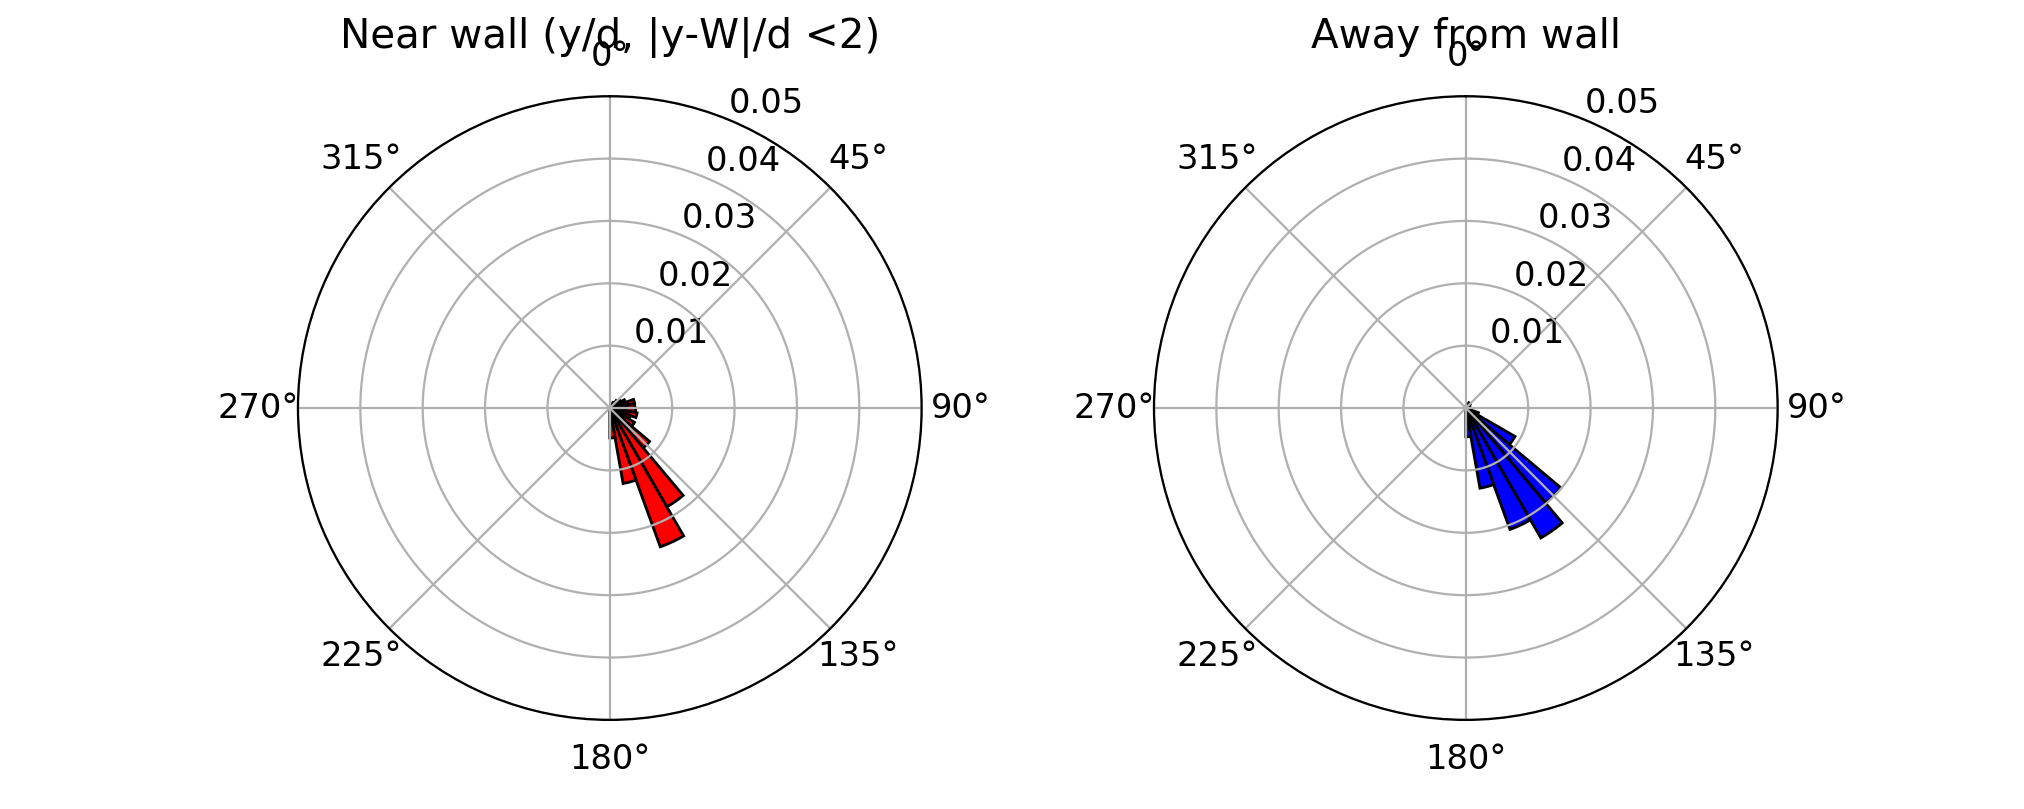

In [412]:
#  Plot histograms
saveFile = 'OrientationHistogram_wallEffect'

bin_size = 10
        
a_near , b_near = np.histogram(theta_array[nearWall], bins=np.arange(0, 180 + bin_size, bin_size), density = True)
a_away , b_away = np.histogram(theta_array[awayWall], bins=np.arange(0, 180 + bin_size, bin_size), density = True)


centers_near = np.deg2rad(np.ediff1d(b_near)//2 + b_near[:-1])
centers_away = np.deg2rad(np.ediff1d(b_away)//2 + b_away[:-1])

fig, axes = plt.subplots(figsize=(10,4), nrows = 1, ncols = 2)

axes[0].hist(theta_array[nearWall], density=True, color = 'r', alpha=0.5)
axes[1].hist(theta_array[awayWall], density=True, color = 'b', alpha=0.5)
axes[0].set_ylim(0,0.05)
axes[1].set_ylim(0,0.05)
axes[0].set_title('Near wall (y/d, |y-W|/d <2)')
axes[1].set_title('Away from walls')
plt.ylabel('PDF')
plt.xlabel('Theta in degrees')

plt.savefig(saveFile + '_'+ track.Organism +'.png', dpi=300)
plt.savefig(saveFile + '_'+ track.Organism +'.svg', dpi=150)

plt.show()

saveFile = 'OrientationHistogramPolar_wallEffect'

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1, projection='polar')
ax.bar(centers_near, a_near, width=np.deg2rad(bin_size), bottom=0.0, color='r', edgecolor='k')
ax.set_title('Near wall (y/d, |y-W|/d <2)')
ax1 = fig.add_subplot(1,2,2, projection='polar')
ax1.bar(centers_away, a_away, width=np.deg2rad(bin_size), bottom=0.0, color='b', edgecolor='k')
ax1.set_title('Away from wall')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax.set_ylim(0,0.05)
ax1.set_ylim(0,0.05)

plt.savefig(saveFile + '_'+ track.Organism +'.png', dpi=300)
plt.savefig(saveFile + '_'+ track.Organism +'.svg', dpi=150)
plt.show()

## Calculate the Kolmogorov-Smirnov distance between the statistics near and away from walls

In [235]:
import scipy.stats as stats

sample_1 = track.Vz[nearWall]
sample_2 = track.Vz[awayWall]
D, p_value = stats.ks_2samp(sample_1, sample_2)
n_X, n_Y = len(sample_1), len(sample_2)

print('KS test statistic: {}, and p-value : {}'.format(D, p_value))

D, p_value = stats.ks_2samp(Swimming_speed[nearWall], Swimming_speed[awayWall])

print('KS test statistic: {}, and p-value : {}'.format(D, p_value))

D, p_value = stats.ks_2samp(theta_array[nearWall], theta_array[awayWall])

print('KS test statistic: {}, and p-value : {}'.format(D, p_value))

KS test statistic: 0.09126492438005673, and p-value : 2.1206236357471058e-23
KS test statistic: 0.18106232260226984, and p-value : 7.490904372602154e-91
KS test statistic: 0.0921452894470705, and p-value : 7.60481383568251e-24


## KS test of velocity distribution near and away from walls

In [ ]:
# Polychaete 6
# Vertical velocity
KS test statistic: 0.09126492438005673, and p-value : 2.1206236357471058e-23
# Swimming speed distribution
KS test statistic: 0.18106232260226984, and p-value : 7.490904372602154e-91
# Velocity orientation distribution
KS test statistic: 0.0921452894470705, and p-value : 7.60481383568251e-24

# Calculate velocity statistics before and after a wall interaction

[97, 208]
5678
5386
5971
12176
11883
12468
(585,)


<IPython.core.display.Javascript object>


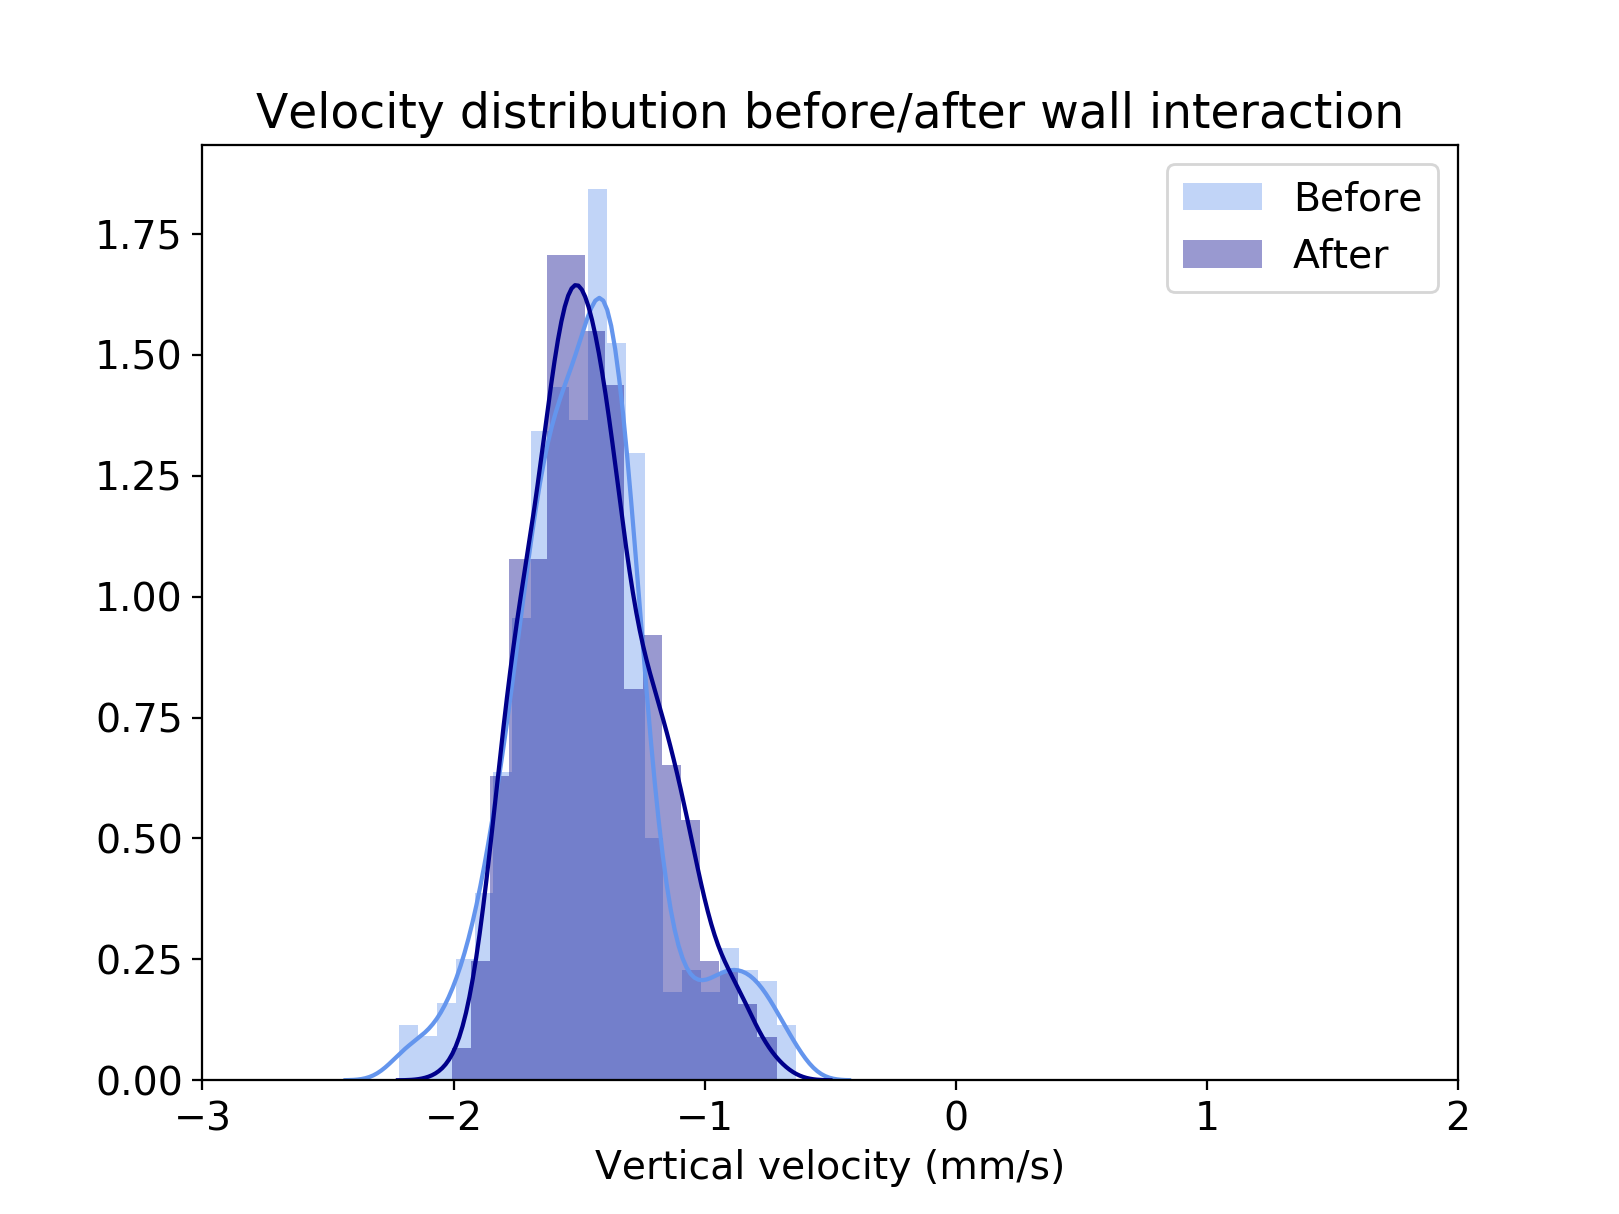

In [259]:
import numpy as np
from matplotlib import rcParams
from matplotlib import rc
#rcParams['axes.titlepad'] = 20 
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
### for Palatino and other serif fonts use:
##rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=False)
#plt.rc('font', family='serif')

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})

np.random.seed(12345678)
# flag = 'before/after wall interaction'

flag = 'before_after wall interaction'
# flag = 'no wall interaction'


if(flag == 'no wall interaction' ):
# Volvox (Away from walls)
#     T_wall_impact = np.random.randint(5,75,10)
    # Polychaete6 (Away from walls)
    T_wall_impact = np.random.randint(5,75,1)
else:
    # Volvox (Wall interaction)
    T_wall_impact = [92]
    # Polychaete6 (Wall interaction)
    T_wall_impact = [97, 208]
#     T_wall_impact = [100]

print(T_wall_impact)

# Plot the velocities before and after the interaction
T_window_low = 5 # Time window before and after the interaction to plot
T_window_high = 5

Time = track.T
X_pos = track.df['Xobjet']
Y_pos = track.df['Yobjet']
Z_pos = track.df['ZobjWheel']

# Shift the track positions based on the wall position
Y_pos = (Y_pos - min(Y_pos)) + track.OrgDim/2

wall_df = pd.DataFrame({'Organism':[], 'TrackName':[], 'Event':[], 'Time':[], 'X':[], 'Y':[], 'Z':[], 
                        'Vx:':[],'Vy:':[],'Vz:':[]})

Speed_before = np.array([])
Speed_after = np.array([])
Vz_before = np.array([])
Vz_after = np.array([])
for event, time_of_impact in enumerate(T_wall_impact):
    
    T_index = next((i for i,x in enumerate(Time) if x >= time_of_impact), 0)
    Tmin_index = next((i for i,x in enumerate(Time) if x >= time_of_impact - T_window), 0)
    Tmax_index = next((i for i,x in enumerate(Time) if x >= time_of_impact + T_window), len(Time))
    
    print(T_index)
    print(Tmin_index)
    print(Tmax_index)
    
    T_subtrack = Time[Tmin_index:Tmax_index]
    
    X_subtrack = X_pos[Tmin_index:Tmax_index]
    Y_subtrack = Y_pos[Tmin_index:Tmax_index]
    Z_subtrack = Z_pos[Tmin_index:Tmax_index]
    
    Vx_subtrack = track.Vx_smooth[Tmin_index:Tmax_index]
    Vy_subtrack = track.Vy_smooth[Tmin_index:Tmax_index]
    Vz_subtrack = track.Vz_smooth[Tmin_index:Tmax_index]
    
    Speed_subtrack = (Vx_subtrack**2 + Vz_subtrack**2)**(1/2)
    
    Speed_before =  np.concatenate((Speed_before, Speed_subtrack[0:T_index - Tmin_index]))
    Speed_after =  np.concatenate((Speed_after, Speed_subtrack[T_index - Tmin_index :Tmax_index - Tmin_index]))
    
    Vz_before =  np.concatenate((Vz_before, Vz_subtrack[0:T_index - Tmin_index]))
    Vz_after =  np.concatenate((Vz_after, Vz_subtrack[T_index - Tmin_index :Tmax_index - Tmin_index]))
    
    wall_df = wall_df.append(pd.DataFrame({'Organism':np.repeat(track.Organism, len(T_subtrack), axis=0), 
                                           'TrackName':np.repeat(trackFile,len(T_subtrack), axis=0), 
                                           'Event':np.repeat(event, len(T_subtrack), axis=0), 'Time':T_subtrack, 'X':X_subtrack, 'Y':Y_subtrack,
                                           'Z':Z_subtrack, 'Vx:':Vx_subtrack,'Vy:':Vy_subtrack,'Vz:':Vz_subtrack}))
    # Plot the trajectory in the YZ plane during wall interaction

#     plt.figure(figsize=(4,3))

#     plt.scatter(T_subtrack, Y_subtrack, 20, color = 'k')
# #     plt.axis('equal')

#     plt.xlabel('Time(s)')
#     plt.ylabel('X position(mm)')
    
#     plt.figure(figsize=(4,3))

#     plt.scatter(T_subtrack, Vz_subtrack, 20, color = 'k')
# #     plt.axis('equal')

#     plt.xlabel('Time(s)')
#     plt.ylabel('Z velocity(mm/s)')


                            
# Make a Swarm plot of velocities before and after:
import seaborn as sns

# plt.figure(figsize=(8,6))
# sns.distplot(Speed_before, color = 'b')
# sns.distplot(Speed_after, color = 'r')


print(np.shape(Vz_before))

color_before = 'cornflowerblue'
color_after =  'darkblue'


plt.figure(figsize=(8,6))
sns.distplot(Vz_before, color = color_before, label = 'Before')
sns.distplot(Vz_after, color = color_after, label = 'After')
plt.xlabel('Vertical velocity (mm/s)')
plt.xlim([-3,2])
plt.title('Velocity distribution before/after wall interaction')
plt.legend(loc ='best')
# plt.savefig('VelocityDist_beforeAfterWallInteraction' + Organism + '.svg', dpi = 150)
# plt.savefig('VelocityDist_beforeAfterWallInteraction' + Organism + '.png', dpi = 300)


    



<IPython.core.display.Javascript object>


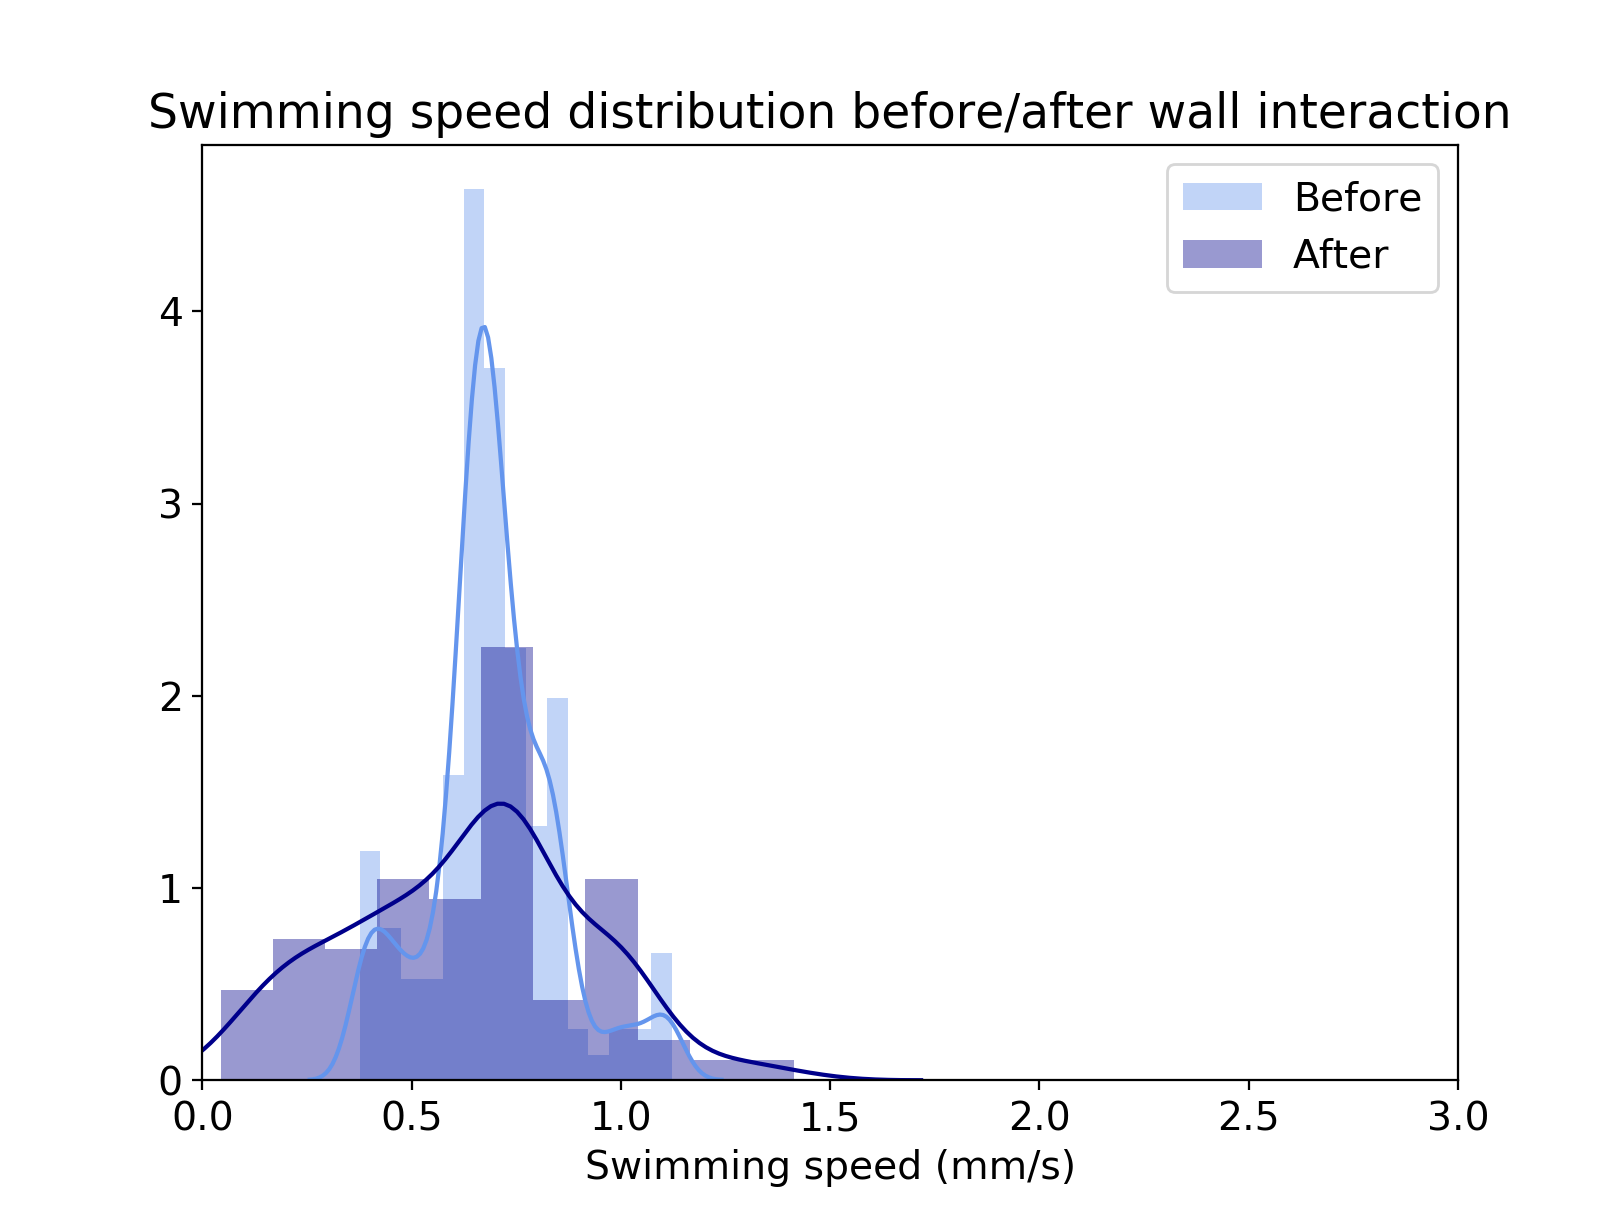

In [251]:
# Plot swimming speed distribution "before" and "after" wall interaction.

plt.figure(figsize=(8,6))
sns.distplot(Speed_before, color = color_before, label = 'Before')
sns.distplot(Speed_after, color = color_after, label = 'After')
plt.xlabel('Swimming speed (mm/s)')
plt.xlim([0,3])
plt.title('Swimming speed distribution before/after wall interaction')
plt.legend(loc ='best')
plt.savefig('SpeedDist_beforeAfterWallInteraction' + Organism + '.svg', dpi = 150)
plt.savefig('SpeedDist_beforeAfterWallInteraction' + Organism + '.png', dpi = 300)

## Trajectory during wall interactions

<IPython.core.display.Javascript object>


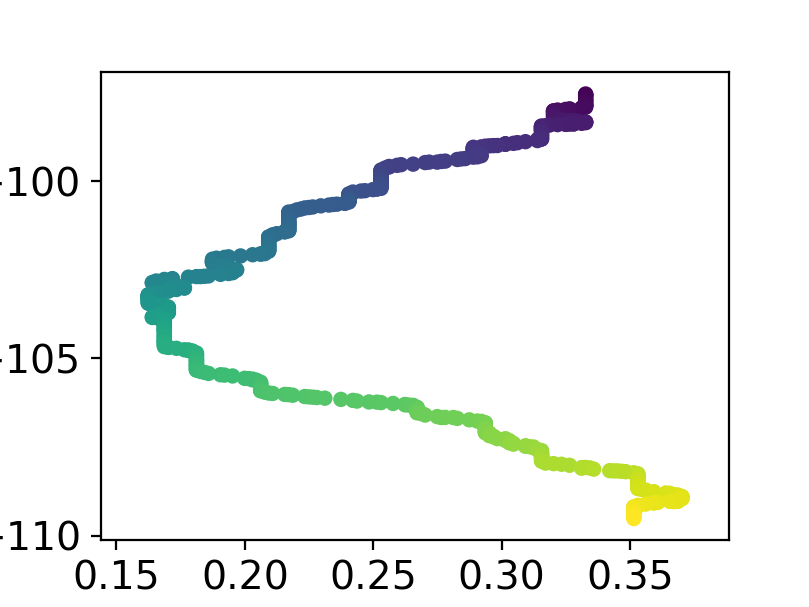

<IPython.core.display.Javascript object>


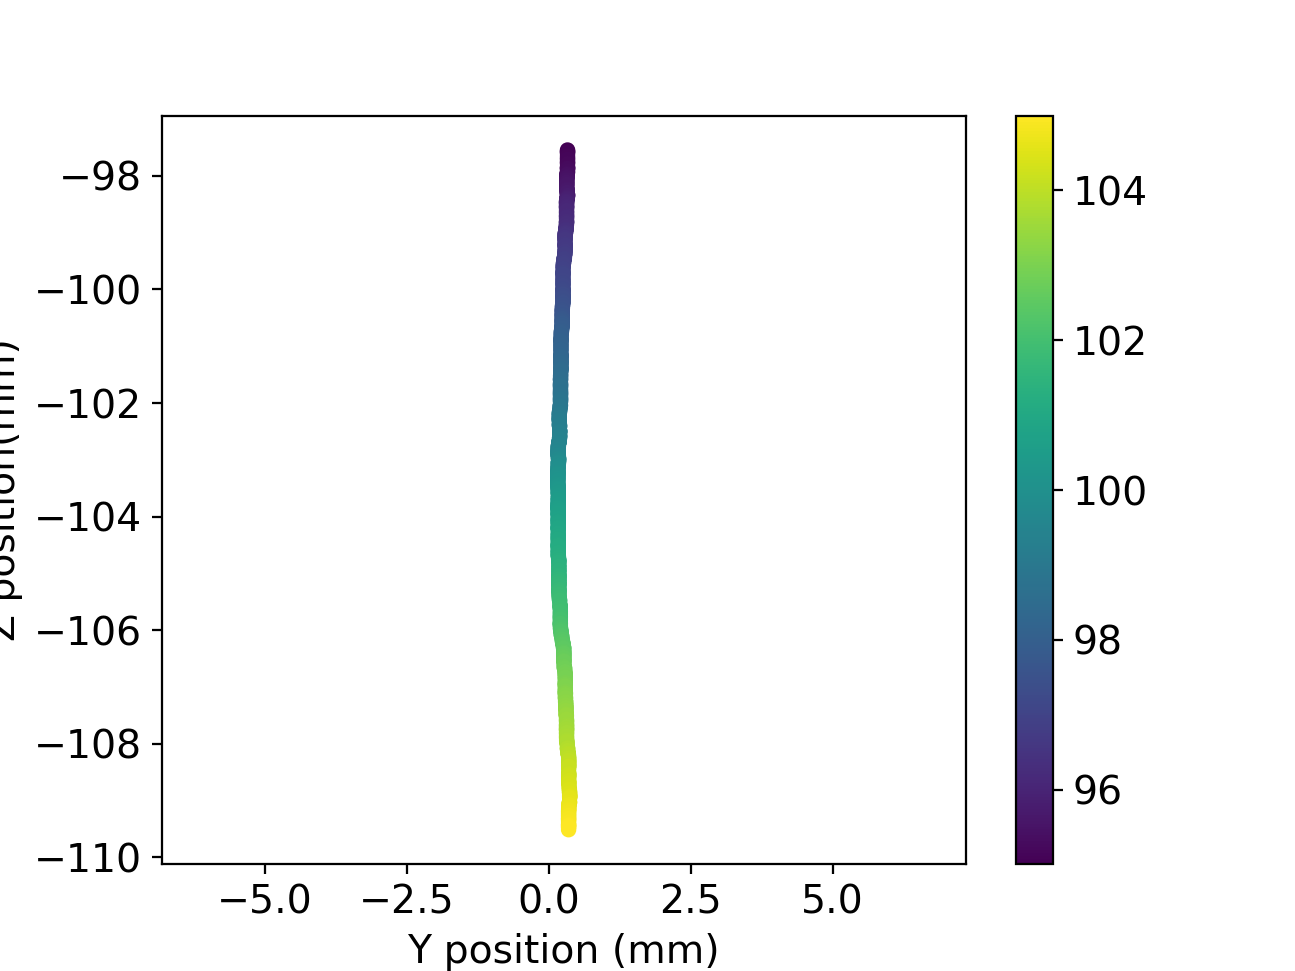

2.1761925505253363


In [138]:
# Plot the trajectory in the YZ plane during wall interaction
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(4,3))

fig = plt.scatter(Y_subtrack[::1], Z_subtrack[::1], s = 20, c = T_subtrack[::1])# plt.axis('equal')

plt.xlabel('Y position (mm)')
plt.ylabel('Z position(mm)')

plt.savefig('YZ_track_'+Organism+'_wallInteraction_unequalScale.png', dpi=300)
plt.savefig('YZ_track_'+Organism+'_wallInteraction_unequalScale.svg', dpi=150)
# plt.savefig('YZ_track_Polychaete6_FullTrack_equalscale.png', dpi=300)
# plt.savefig('YZ_track_Polychaete6_FullTrack_equalscale.svg', dpi=150)


# Unequal axis scale
plt.figure()
track.T = track.T - track.T[0]
fig = plt.scatter(Y_subtrack[::1], Z_subtrack[::1], s = 20, c = T_subtrack[::1])

ratio = 1
ax = plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*ratio)
plt.xlim(0,5)
plt.xlabel('Y position (mm)')
plt.ylabel('Z position(mm)')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
plt.axis('equal')

plt.colorbar(fig)

plt.savefig('YZ_track_'+Organism+'_wallInteraction.png', dpi=300)
plt.savefig('YZ_track_'+Organism+'_wallInteraction.svg', dpi=150)

# Estimate angle of interaction withb wall
delta_y = 0.35 -0.16
delta_z = 5

theta = np.arctan(delta_y/delta_z)

print(theta*180/np.pi)

<IPython.core.display.Javascript object>


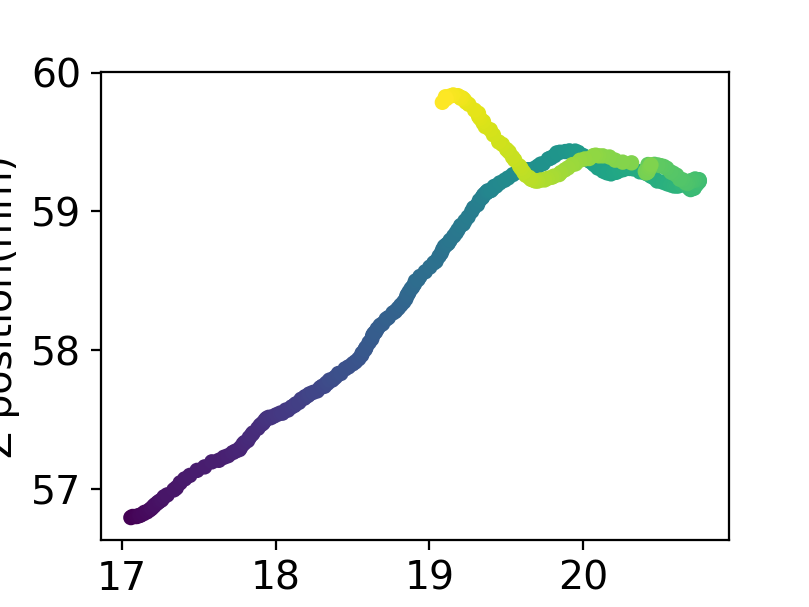

<IPython.core.display.Javascript object>


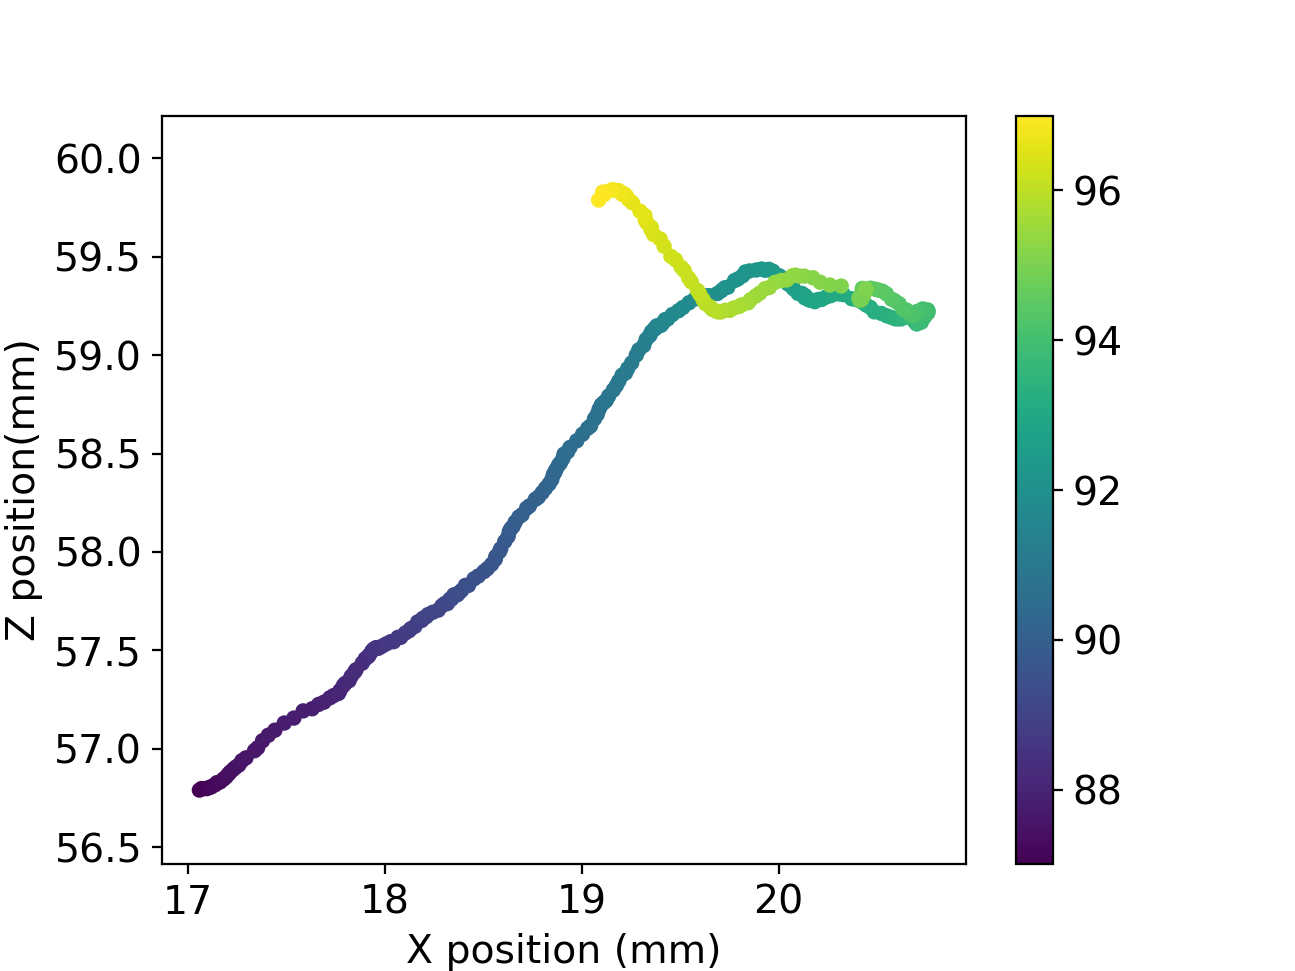

-76.96134341697709


In [147]:
# Plot the trajectory in the XZ plane during wall interaction
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(4,3))

fig = plt.scatter(X_subtrack[::1], Z_subtrack[::1], s = 20, c = T_subtrack[::1])# plt.axis('equal')

plt.xlabel('X position (mm)')
plt.ylabel('Z position(mm)')

plt.savefig('XZ_track_'+Organism+'_wallInteraction_unequalScale.png', dpi=300)
plt.savefig('XZ_track_'+Organism+'_wallInteraction_unequalScale.svg', dpi=150)

# Unequal axis scale
plt.figure()
track.T = track.T - track.T[0]
fig = plt.scatter(X_subtrack[::1], Z_subtrack[::1], s = 20, c = T_subtrack[::1])

ratio = 1
ax = plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*ratio)
plt.xlim(0,5)
plt.xlabel('X position (mm)')
plt.ylabel('Z position(mm)')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
plt.axis('equal')

plt.colorbar(fig)

plt.savefig('XZ_track_'+Organism+'_wallInteraction.png', dpi=300)
plt.savefig('XZ_track_'+Organism+'_wallInteraction.svg', dpi=150)

# Estimate angle of interaction withb wall
delta_x = 19.8 - 20.75
delta_z = 59.42 - 59.2

theta = np.arctan(delta_x/delta_z)

print(theta*180/np.pi)

<IPython.core.display.Javascript object>


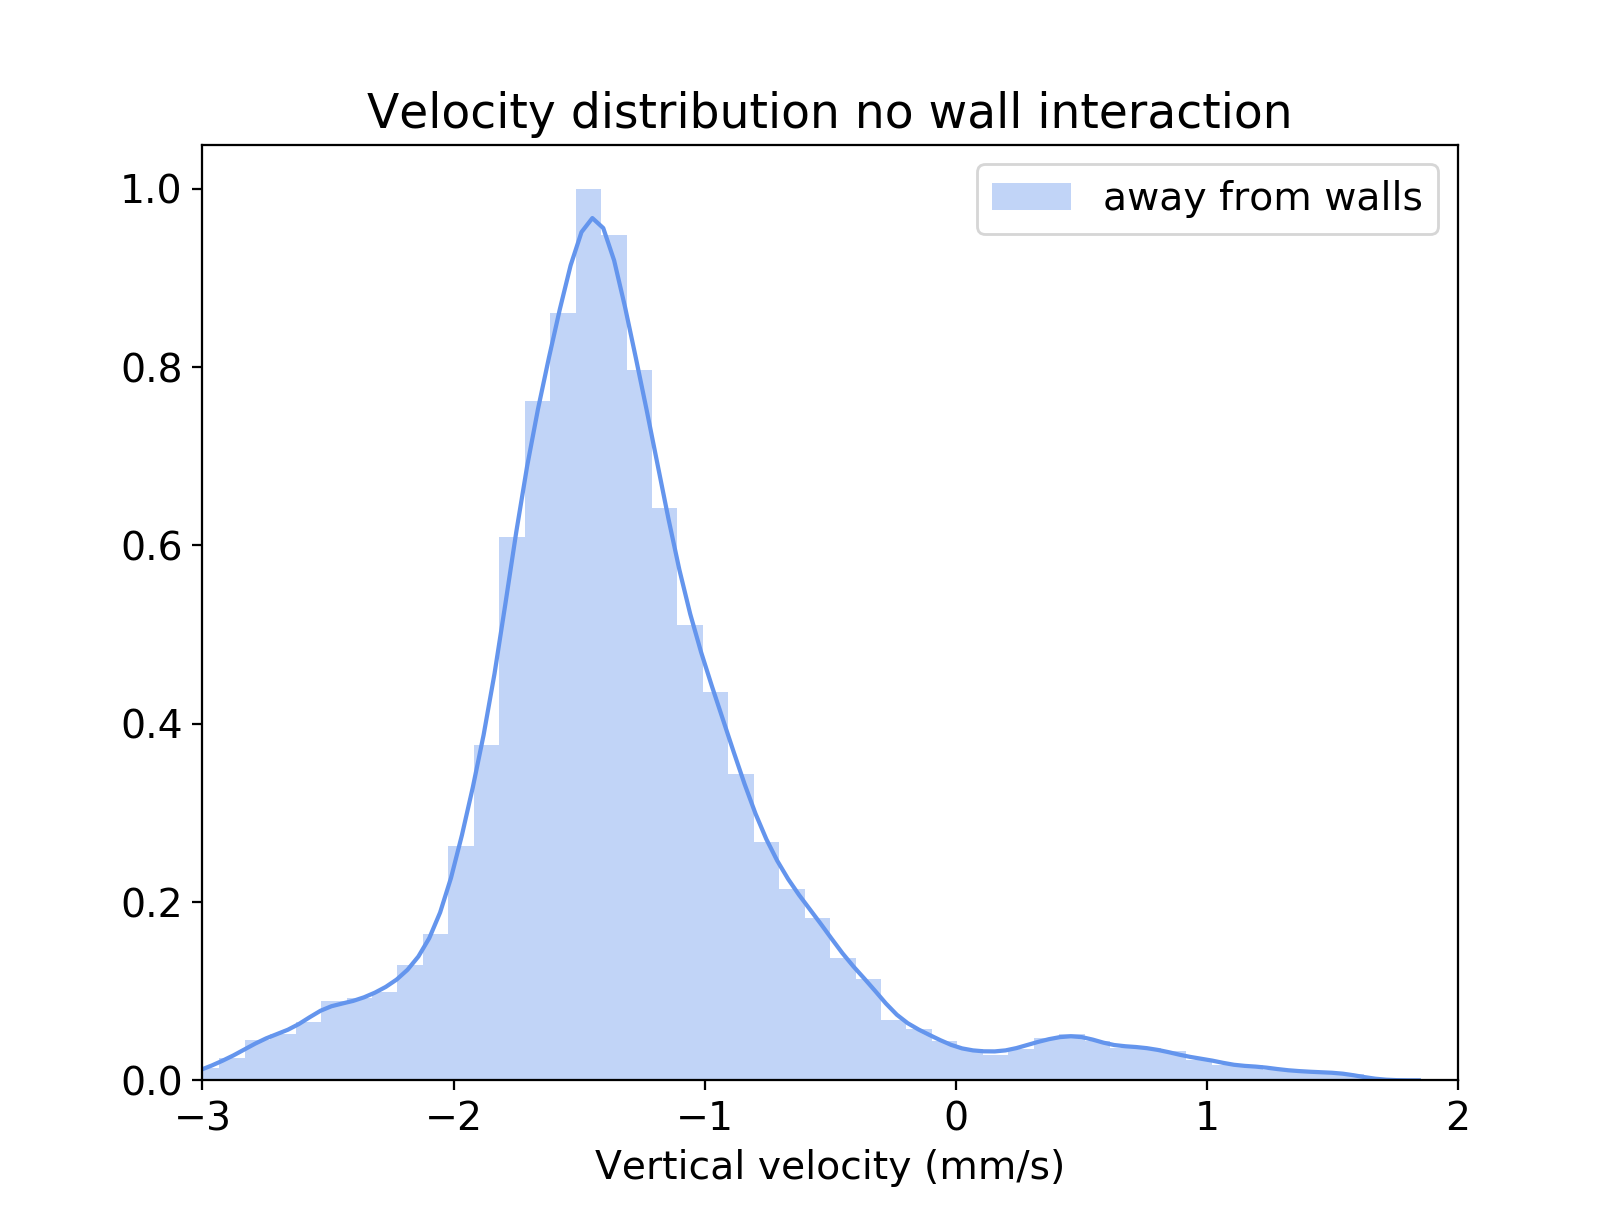

In [260]:
# Base-line for comparison:
# Velocity dist away from walls:

# Volvox:
# T_index = next((i for i,x in enumerate(Time) if x >= 80), 0)
# Vz_awayFromWalls = track.Vz_smooth[0:T_index]
# Vx_awayFromWalls = track.Vx_smooth[0:T_index]

Speed_awayFromWalls = (Vx_awayFromWalls**2 + Vz_awayFromWalls**2)**(1/2)

Vx_awayFromWalls = track.Vx_smooth[awayWall]

Vz_awayFromWalls = track.Vz_smooth[awayWall]

SwimmingSpeed_awayFromWalls = (Vx_awayFromWalls**2 + Vz_awayFromWalls**2)**(1/2)

plt.figure(figsize=(8,6))
sns.distplot(Vz_awayFromWalls, color = 'cornflowerblue', label = 'away from walls')
plt.xlabel('Vertical velocity (mm/s)')
plt.xlim([-3,2])
plt.title('Velocity distribution no wall interaction')
plt.legend(loc ='best')
# plt.savefig('VelocityDist_NoWallInteraction' + Organism + '.svg', dpi = 150)
# plt.savefig('VelocityDist_NoWallInteraction' + Organism + '.png', dpi = 300)




<IPython.core.display.Javascript object>


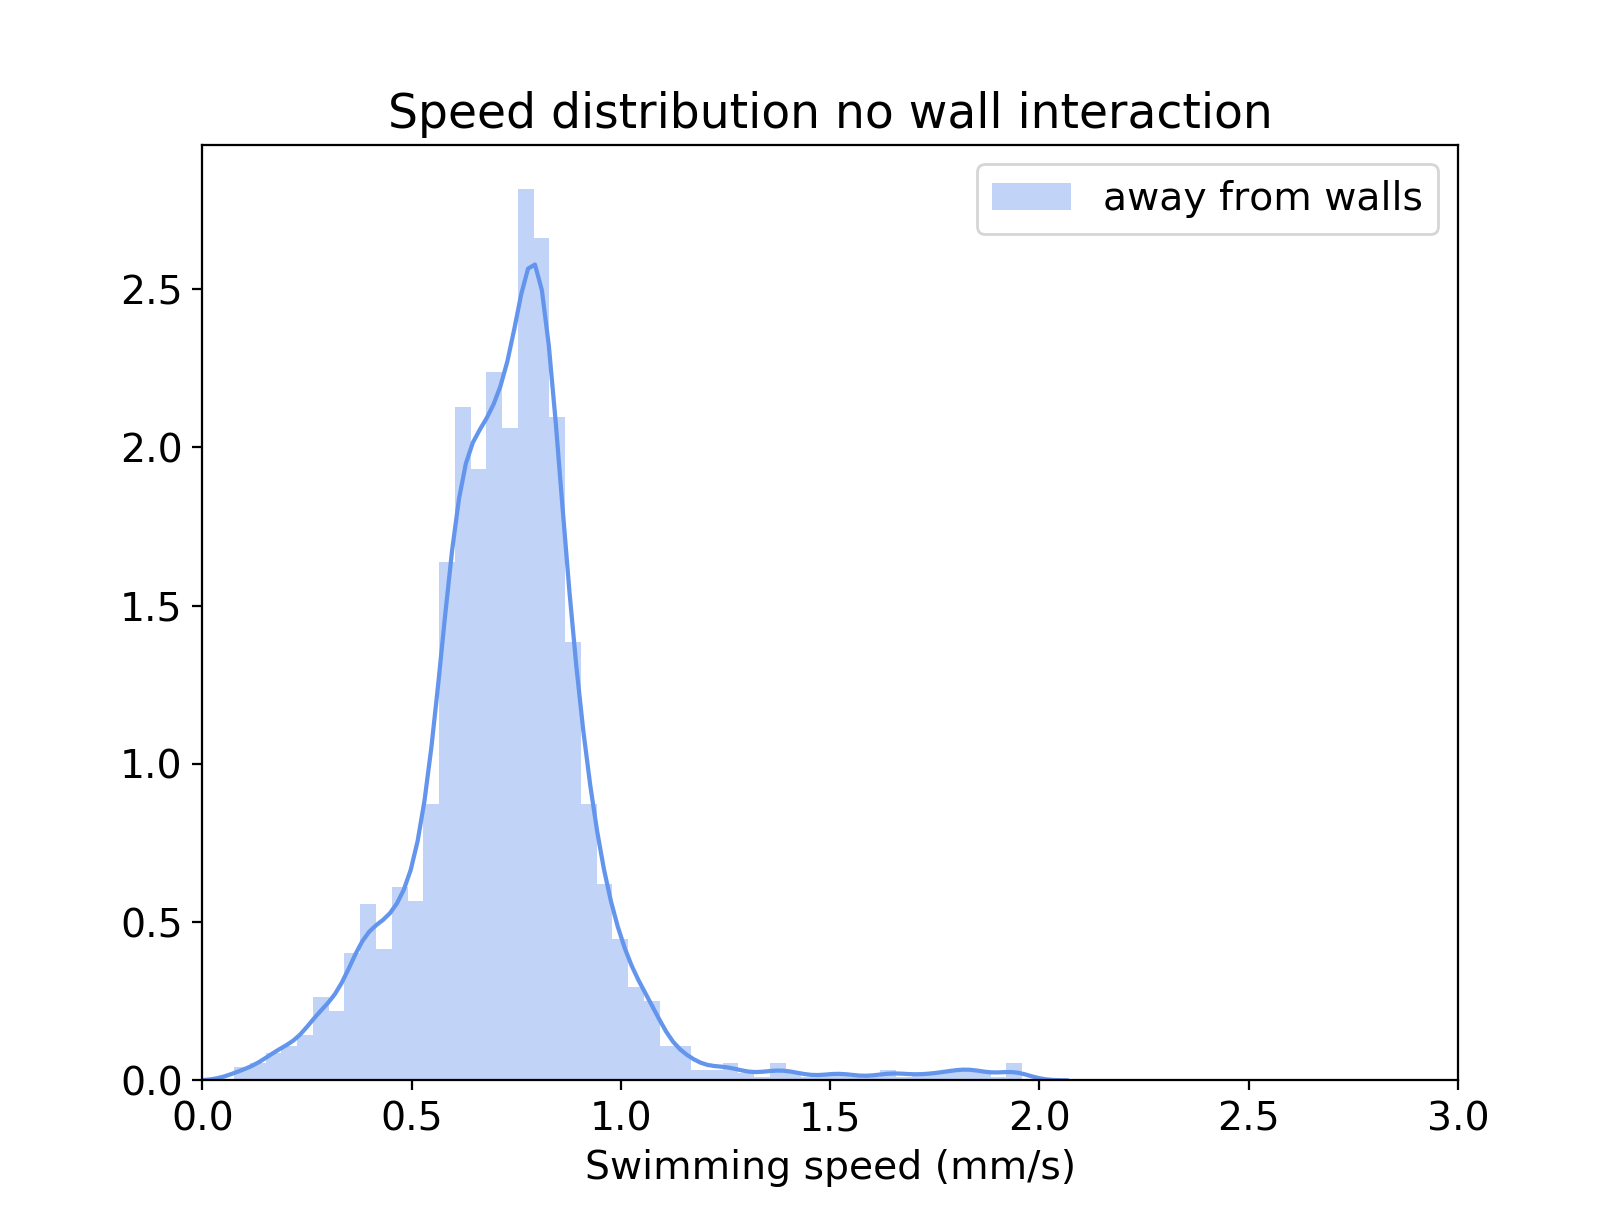

In [261]:
# Speed distribution away from walls
plt.figure(figsize=(8,6))
sns.distplot(Speed_awayFromWalls, color = 'cornflowerblue', label = 'away from walls')
plt.xlabel('Swimming speed (mm/s)')
plt.xlim([0, 3])
plt.title('Speed distribution no wall interaction')
plt.legend(loc ='best')
plt.savefig('SpeedDist_NoWallInteraction' + Organism + '.svg', dpi = 150)
plt.savefig('SpeedDist_NoWallInteraction' + Organism + '.png', dpi = 300)

In [263]:
# K-S two sample test to distinguish the distributions
import scipy.stats as stats

# Comparing before velocity to velocity dist away from walls
sample_1 = Vz_before
sample_2 = Vz_awayFromWalls
n_X, n_Y = len(sample_1), len(sample_2)

D, p_value = stats.ks_2samp(sample_1, sample_2)

D_critical = 1.36*(1/n_X + 1/n_Y)**(1/2)

print('Comparing before velocity to velocity dist away from walls')
print('KS test statistic: {}, and p-value : {}'.format(D, p_value))
print('D_critical: {}'.format(D_critical))

# Comparing after velocity to velocity dist away from walls
sample_1 = Vz_after
sample_2 = Vz_awayFromWalls
n_X, n_Y = len(sample_1), len(sample_2)
D, p_value = stats.ks_2samp(sample_1, sample_2)
D_critical = 1.36*(1/n_X + 1/n_Y)**(1/2)

print('Comparing after velocity to velocity dist away from walls')
print('KS test statistic: {}, and p-value : {}'.format(D, p_value))
print('D_critical: {}'.format(D_critical))


# Comparing before velocity to after velocity
sample_1 = Vz_after
sample_2 = Vz_before
n_X, n_Y = len(sample_1), len(sample_2)

D, p_value = stats.ks_2samp(sample_1, sample_2)
D_critical = 1.36*(1/n_X + 1/n_Y)**(1/2)

print('Comparing before velocity to after velocity')
print('KS test statistic: {}, and p-value : {}'.format(D, p_value))
print('D_critical: {}'.format(D_critical))



Comparing before velocity to velocity dist away from walls
KS test statistic: 0.2322313886161934, and p-value : 1.1054870241198348e-26
D_critical: 0.057443446571036894
Comparing after velocity to velocity dist away from walls
KS test statistic: 0.18757427362547152, and p-value : 1.4825762383947132e-17
D_critical: 0.057443446571036894
Comparing before velocity to after velocity
KS test statistic: 0.07008547008547009, and p-value : 0.11299305692161356
D_critical: 0.07951992708383732


## Results of K-S test for velocity distributions before and after wall interactions.

In [ ]:

# Volvox phototaxis 
# No wall impact: (over 10 randomly chosen points in track regions away from walls)
KS test statistic: 0.06160921863944203, and p-value : 0.005663622734692453

# Wall impact (T=92 s)
KS test statistic: 0.6663226694186446, and p-value : 4.440892098500626e-16
        
# Comparing before velocity to velocity dist away from walls
# KS test statistic: 0.5267835317124537, and p-value : 2.220446049250313e-15
# Comparing after velocity to velocity dist away from walls
# KS test statistic: 0.7633188323560935, and p-value : 7.633867601191195e-74
# Comparing before velocity to after velocity
# KS test statistic: 0.6663226694186446, and p-value : 4.440892098500626e-16
        
# Polychaete-6 
# No wall impact (over 10 randomly chosen points in track regions away from walls)
KS test statistic: 0.037144808743169395, and p-value : 1.0

# 2-wall impacts at T=97 s, 208 s.
KS test statistic: 0.07008547008547009, and p-value : 0.11299305692161356

# Comparing before velocity to velocity dist away from walls
# KS test statistic: 0.2322313886161934, and p-value : 1.1054870241198348e-26
# Comparing after velocity to velocity dist away from walls
# KS test statistic: 0.18757427362547152, and p-value : 1.4825762383947132e-17
# Comparing before velocity to after velocity
# KS test statistic: 0.07008547008547009, and p-value : 0.11299305692161356